In [951]:
#Importing Pandas module
import pandas as pd
#importing numpy module
import  numpy as np

#import maptplot andd seaborn lib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data understanding

In [952]:
#Loading Loan Data

lending = pd.read_csv("loan.csv", encoding = "ISO-8859-1", low_memory=False)

#### Get some insights about the data we loaded

In [953]:
# view the loaded dataset information, how it looks 
lending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [954]:
# Lets check how many rows and columns we have in the dataframe
lending.shape

(39717, 111)

In [955]:
# Looking how the data looks like
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [956]:
# Get the column details
pd.options.display.max_columns = None
lending.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [957]:
cols = lending.columns.tolist()
print(cols)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

#### Lets look at the data with some stats about coumns which has NA

##### Columns which has na count more than 25%

In [958]:
count_na = lending.isnull().sum()

In [959]:
# Printing NA or missing values in each column
count_na

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [960]:
# calculating percentage of missing values / na's 
count_na_25 = count_na[count_na.values > (0.25 * len(lending))]
count_na_25

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


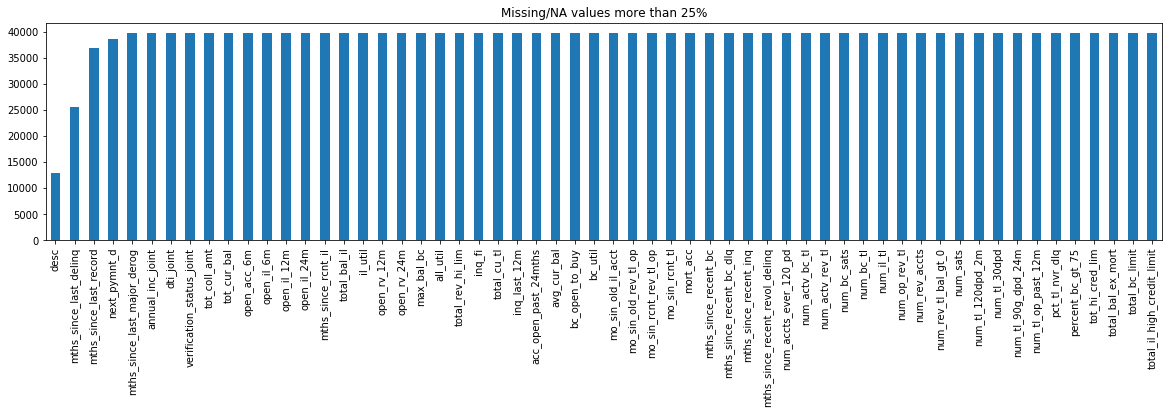

In [961]:
# Plot missing values or NA values more than 25%
plt.figure(figsize=(20,4))
count_na_25.plot(kind='bar')
plt.title('Missing/NA values more than 25%')
plt.show()

As we see from above chart we can say more than **30+** columns have missing values from **39717 rows** and **111 columns**.

Also, there are cloumns having missing values above **25%, 50% and 75% aswell.

Now lets see how many **columns have 100% missing values**

In [962]:
count_na_perc = round((count_na/len(lending)) * 100)

In [963]:
# Lets look at percentage of columns have 100% missing values
count_na_perc

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.00
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [964]:
# get the 100% missing values
perc_na_100 = count_na_perc[(count_na_perc == 100)]

# get the count for 100% missing values
count_na_100 = count_na_perc[(count_na_perc == 100)].count()
count_na_100


54

There are **54 columns** having **100%** missing values

In [965]:
#Get the missing values between 50% and  100%
perc_na_50 = count_na_perc[(count_na_perc >= 50) & (count_na_perc < 100 )]

#Get the count for greater than 50% and below 100%
count_na_50 = count_na_perc[(count_na_perc >= 50) & (count_na_perc < 100 )].count()
count_na_50

3

There are **3 columns** having **greater than 50%** and **less than 100%**missing values

In [966]:
#Get the missing values between 30% and  50%
perc_na_30 = count_na_perc[(count_na_perc >= 30) & (count_na_perc < 50 )]

#Get the count for greater than 30% and less than 50%
count_na_30 = count_na_perc[(count_na_perc >= 30) & (count_na_perc < 50 )].count()
count_na_30

1

There are **1 columns** having **greater than 30%** and **less than 50%**missing values

## Data Cleanup

As we saw in above data analysis there are plenty of **100%** missing values and few missing values below **100% and 50%**. Let's remove all those missing values step by step. <br />

In [967]:
# Now lets remove 100% missing value columns.
# we already extracted 100% missing values from dataframe in perc_na_100 variable
lending_miss=list(perc_na_100[perc_na_100 == 100].index)

In [968]:
len(lending_miss)

54

In [969]:
#removed 100% missing values
lending = lending.drop(lending_miss,axis=1)

#### 100% missing values removed
As we **drop 100%** missing value columns from the dataframe we should have **57** columns out of **111** columns

In [970]:
# Now we see that 54 columns were removed out of 111
lending.shape

(39717, 57)

As we stated above now we have **57** columns in our dataframe

Now let's remove **50%** above missing value from the **dataframe**

In [971]:
# Now lets remove 50% and above missing value columns.
# we already extracted 50% missing values from dataframe in perc_na_50 variable
lending_miss_50=list(perc_na_50[perc_na_50 >= 50].index)
len(lending_miss_50)

3

In [972]:
#removed 50% missing values
lending = lending.drop(lending_miss_50,axis=1)

#### 50% and above missing values removed
As we **drop 50% and above** missing value columns from the dataframe we should have **54** columns out of **57** columns

In [973]:
# Now we see that 3 columns were removed out of 57
lending.shape

(39717, 54)

As we stated above now we have **54** columns in our dataframe

Now let's remove **30% above and 50% below** missing value from the **dataframe**

In [974]:
# Now lets remove 30% above and 50% below missing value columns.
# we already extracted 30% above and below 50% missing values from dataframe and stored in perc_na_30 variable
lending_miss_30=list(perc_na_30[perc_na_30 < 50].index)
len(lending_miss_30)

1

In [975]:
lending = lending.drop(lending_miss_30,axis=1)

#### 30% above and below 50% values removed
As we **drop 30% above and below 50%** missing value columns from the dataframe we should have **53** columns out of **54** columns

In [976]:
# Now we see that 1 columns were removed out of 54
lending.shape

(39717, 53)

In [977]:
# checking records
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


 Let's remove the **special characters** in **int_rate** column and convert to float

In [978]:
# Let's remove the '%' symbol and convert int_rate from string to float
lending['int_rate'] = lending['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [979]:
# Lets look at the field
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


#### Now we should not keep only unique values equal to 1


In [980]:
unique = lending.nunique()
unique = unique[unique.values == 1]
unique

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [981]:
lending.drop(labels = list(unique.index), axis =1, inplace=True)

In [982]:
lending.shape

(39717, 44)

In [983]:
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


#### Removing customer behavior variables (columns).
The following variables are related to customer behavior after the loan approval. Thus they are not required in the data analysis

In [984]:
lending.drop([
              'delinq_2yrs',
              'revol_bal',
              'revol_util',
              'out_prncp',
              'out_prncp_inv',
              'total_pymnt',
              'total_pymnt_inv',
              'total_rec_prncp',
              'total_rec_int',
              'total_rec_late_fee',
              'recoveries',
              'collection_recovery_fee',
              'last_pymnt_d',
              'last_pymnt_amnt',
              'last_credit_pull_d',
              'earliest_cr_line',
              'inq_last_6mths',
              'open_acc',
              'pub_rec',
              'total_acc',
              'pub_rec_bankruptcies',
                
              ], axis=1, inplace=True)

In [985]:
lending.shape

(39717, 23)

In [986]:
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94


#### Columns which are not required
+ **id** - A unique LC assigned ID for the loan listing. <br />
+ **member_id** - A unique LC assigned Id for the borrower member.  <br />
+ **funded_amnt** - The total amount committed to that loan at that point in time. <br />
+ **funded_amnt_inv** - The total amount committed by investors for that loan at that point in time. <br />
+ **url** - URL for the LC page with listing data. <br />
+ **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application. <br />

The following variables are not required in the analysis as they are unique to the applicant: <br />
'id', 'member_id', 'url' <br />

'zip_code' is a categorical variable and has 823 unique values and thus will not be that useful for analysis and it is removed from the data set <br />

'funded_amnt' and 'funded_amnt_inv' are removed from the data set as 'loan_amnt' will be used for analysis <br />


In [987]:
# Uniqueness of zip_code
lending.zip_code.describe()

count     39717
unique      823
top       100xx
freq        597
Name: zip_code, dtype: object

In [988]:
# Columns which are not required are putting together into a list
not_required_cols = ['id','member_id','funded_amnt','funded_amnt_inv','url','zip_code']

In [989]:
# Dropping the columns which are not required for analysis
lending.drop(labels = not_required_cols, axis =1, inplace=True)

In [990]:
print("After Dropping {} columns, we have {} rows and {} columns. ".format(len(not_required_cols),(lending.shape)[0],(lending.shape)[1]))

After Dropping 6 columns, we have 39717 rows and 17 columns. 


In [991]:
lending.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94


In [992]:
# Unique values in emp_title
lending.emp_title.describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [993]:
# As 'emp_title' is categorical variable with 28820 unique values, it is not useful for analysis and thus it will be removed
lending.drop('emp_title',axis=1,inplace=True)

In [994]:
# Unique values in title
lending.title.describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [995]:
# As 'title' is categorical variable with 19615 unique values, it is not useful for analysis and thus it will be removed
lending.drop('title',axis=1,inplace=True)

In [996]:
# Unique values in issue_d
lending.issue_d.describe()

count      39717
unique        55
top       Dec-11
freq        2260
Name: issue_d, dtype: object

In [997]:
# As 'issue_d' is categorical variable with many unique values, it is not useful for analysis and thus it will be removed
lending.drop('issue_d',axis=1,inplace=True)

In [998]:
# Unique values in addr_state
lending.addr_state.describe()

count     39717
unique       50
top          CA
freq       7099
Name: addr_state, dtype: object

In [999]:
# As 'addr_state' is categorical variable with many unique values, it is not useful for analysis and thus it will be removed
lending.drop('addr_state',axis=1,inplace=True)

######################################################
#### Removing/Replacing Missing rows/column values
######################################################

#### Find remaining missing values and remove those rows

In [1000]:
# Finding the percentage of columns having missing values
lend_missing = round(100*(lending.isnull().sum()/len(lending.loan_amnt)), 2)
lend_missing[lend_missing != 0]

emp_length   2.71
dtype: float64

#### As we have 39717 rows of data, there is lots of data to make analysis, thus we will remove the missing values for 'emp_length'  instead of predicting the values to fill-in the missing values

In [1001]:
# Dropping empty values in emp_length
lending=lending[~lending.emp_length.isnull()]
lending.shape

(38642, 13)

In [1002]:
# Finding the percentage of columns having missing values
lend_missing = round(100*(lending.isnull().sum()/len(lending.loan_amnt)), 2)
lend_missing[lend_missing != 0]

Series([], dtype: float64)

In [1003]:
# Drop duplicates
lending=lending.drop_duplicates()

############################
#### Data Clean Completed
############################

In [1004]:
print("After data cleanup we have {} rows and {} columns. ".format((lending.shape)[0],(lending.shape)[1]))

After data cleanup we have 38642 rows and 13 columns. 


In [1005]:
#Now we will extract numeric data from the emp_length column
lending.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [1006]:
# creating dictionary to convert to numbers for easier manupulation.
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [1007]:
#Converting Strings to int ie., employment length should be between 0 to 10
lending = lending.replace({"emp_length": emp_length_dict })

In [1008]:
lending.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65
1,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Charged Off,car,1.00
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00
4,3000,60 months,12.69,67.79,B,B5,1,RENT,80000.00,Source Verified,Current,other,17.94


In [1009]:
#convert term from string to int
lending['term'] = lending['term'].apply(lambda x: x.split("months")[0])

In [1010]:
# check data after removing string from the term field
lending.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Charged Off,car,1.00
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00
4,3000,60,12.69,67.79,B,B5,1,RENT,80000.00,Source Verified,Current,other,17.94


In [1011]:
#check how many tenures are present in dataset
lending.term.value_counts()


 36     28287
 60     10355
Name: term, dtype: int64

***earliest_cr_line** : Lets split it into two different columns month and year, by keeping name **earliest_cr_line_month** and **earliest_cr_line_year**

In [1012]:
lending.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Charged Off,car,1.00
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00
4,3000,60,12.69,67.79,B,B5,1,RENT,80000.00,Source Verified,Current,other,17.94


In [1013]:
# Converting term to int
lending['term'] = lending['term'].astype("int32")

In [1014]:
lending.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Charged Off,car,1.00
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00
4,3000,60,12.69,67.79,B,B5,1,RENT,80000.00,Source Verified,Current,other,17.94


Removing customer behavior variables i.e. which are generated after the loan is approved

In [1015]:
lending.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Charged Off,car,1.00
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00
4,3000,60,12.69,67.79,B,B5,1,RENT,80000.00,Source Verified,Current,other,17.94


##### In loan_status variable, current data is not required. Creating data frame with only Fully Paid and Charged Off data

In [1016]:
# Creating data frames for Charged off and Fully paid
lending_1 = lending[lending['loan_status']!='Current']

In [1017]:
lending_1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Charged Off,car,1.00
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20


In [1018]:
lending_1.shape

(37544, 13)

####################################################################################################################
################################################ Data Analysis ########################################################
####################################################################################################################

In [1019]:
# Set the format
pd.set_option('display.float_format', lambda z: '%.2f' % z)

################################
########## Emp_length ##########
################################

In [1020]:
# Showing the statistical values of the variable
lending_1.emp_length.describe()

count   37544.00
mean        4.94
std         3.56
min         0.00
25%         2.00
50%         4.00
75%         9.00
max        10.00
Name: emp_length, dtype: float64

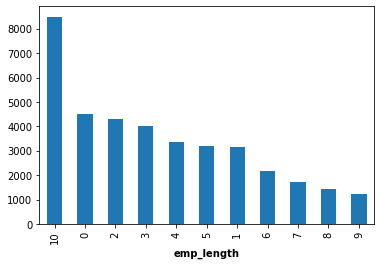

In [1021]:
# Plotting bar chart of counts of the unique values in the variable
pd.value_counts(lending_1['emp_length']).plot.bar()
plt.xlabel('emp_length', fontweight ='bold')
plt.show()

#### No. of loan given to people with low, medium and high emp_length
1) low - 0-4 years <br />
2) Medium - 5-9 years <br />
3) High - 10 years and above <br />


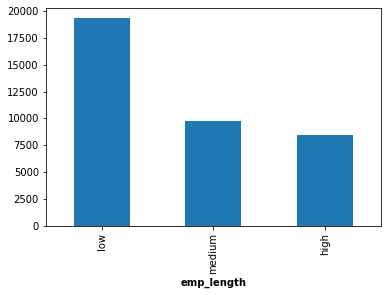

In [1022]:
# Plotting the counts of the range
lending_1['emp_length_1'] = np.nan

# Creating a new variable emp_length_1  where the value stored is 'low' for emp_length >=0 and emp_length <=4
lending_1['emp_length_1'] = np.where((lending_1['emp_length'] >= 0) & (lending_1['emp_length'] <= 4),'low',lending_1['emp_length_1'])

# Creating a new variable emp_length_1  where the value stored is 'low' for emp_length >=5 and emp_length <=9
lending_1['emp_length_1'] = np.where((lending_1['emp_length'] >= 5) & (lending_1['emp_length'] <= 9),'medium',lending_1['emp_length_1'])

# Creating a new variable emp_length_1  where the value stored is 'low' for emp_length >= 10
lending_1['emp_length_1'] = np.where((lending_1['emp_length'] >= 10),'high',lending_1['emp_length_1'])

# Plotting the bar chart
pd.value_counts(lending_1['emp_length_1']).plot.bar()
plt.xlabel('emp_length', fontweight ='bold')
plt.show()

#### Defaulter and Non-defaulter rate for Emp_length 

In [1023]:
# Computing the default and non-default rate

# Assigning the data with emp_length_1 is equal to low
Emp_length_low = lending_1[lending_1['emp_length_1']=='low']

# Assigning the data with emp_length_1 is equal to low
Emp_length_med = lending_1[lending_1['emp_length_1']=='medium']

# Assigning the data with emp_length_1 is equal to low
Emp_length_high = lending_1[lending_1['emp_length_1']=='high']

# Computing the value counts for 'charged-off' and 'paid-off'
Emp_length_low_counts = Emp_length_low['loan_status'].value_counts()

# Computing the total counts of 'charged-off' and 'paid-off'
Emp_length_low_counts_sum = Emp_length_low_counts.sum()

# Computing the default and non-default rate
Emp_length_low_default_rate = Emp_length_low_counts / Emp_length_low_counts_sum

# Computing the value counts for 'charged-off' and 'paid-off'
Emp_length_med_counts = Emp_length_med['loan_status'].value_counts()

# Computing the total counts of 'charged-off' and 'paid-off'
Emp_length_med_counts_sum = Emp_length_med_counts.sum()

# Computing the default and non-default rate
Emp_length_med_default_rate = Emp_length_med_counts / Emp_length_med_counts_sum

# Computing the value counts for 'charged-off' and 'paid-off'
Emp_length_high_counts = Emp_length_high['loan_status'].value_counts()

# Computing the total counts of 'charged-off' and 'paid-off'
Emp_length_high_counts_sum = Emp_length_high_counts.sum()

# Computing the default and non-default rate
Emp_length_high_default_rate = Emp_length_high_counts / Emp_length_high_counts_sum

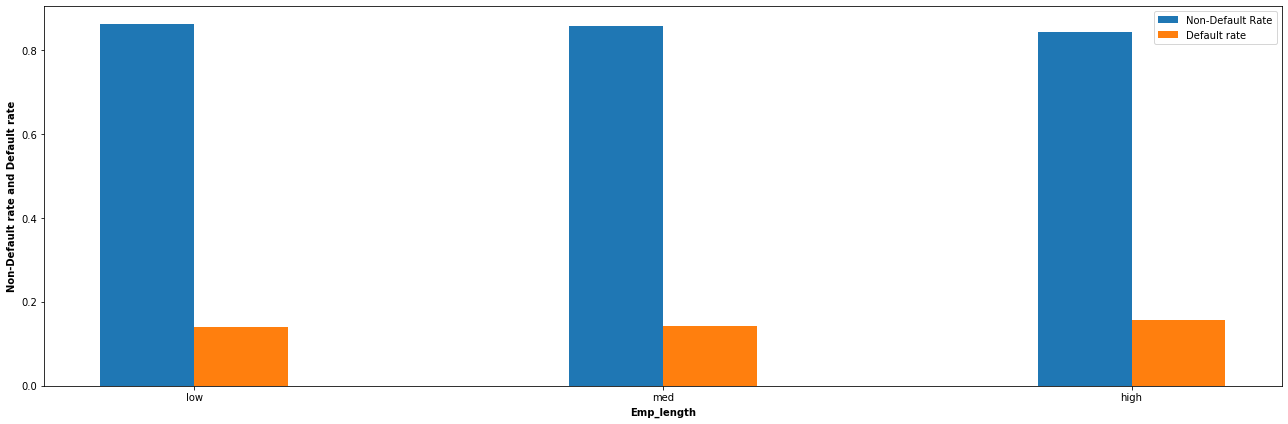

In [1024]:
# Plotting the non-default and default rate

# Assigning the non-default rate and default-rate values for low, medium and high
data = [[Emp_length_low_default_rate[0], Emp_length_med_default_rate[0], Emp_length_high_default_rate[0]],
[Emp_length_low_default_rate[1], Emp_length_med_default_rate[1], Emp_length_high_default_rate[1]]]

fig = plt.subplots(figsize =(18, 6)) 

plt.xlabel('Emp_length', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

################################
########## annual_inc ############
################################

In [1025]:
# Showing the statistical values of the variable
lending_1.annual_inc.describe()

count     37544.00
mean      69407.08
std       64676.98
min        4000.00
25%       41000.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

#### No. of loan given to people with low, medium, medium-high and high annual_inc
1) low - upto 40,000 <br />
2) Medium - from 40,000 upto 60000 <br />
3) Medium-High - from 60,000 upto 80,000 <br />
4) High - above 80,000 <br />

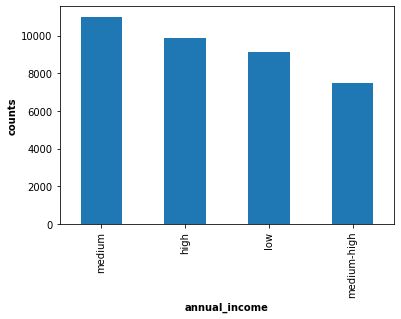

In [1026]:
# Plotting the counts of the range
lending_1['annual_inc_1'] = np.nan
lending_1['annual_inc_1'] = np.where((lending_1['annual_inc'] >= 0) & (lending_1['annual_inc'] <= 40000),'low',lending_1['annual_inc_1'])
lending_1['annual_inc_1'] = np.where((lending_1['annual_inc'] > 40000) & (lending_1['annual_inc'] <= 60000),'medium',lending_1['annual_inc_1'])
lending_1['annual_inc_1'] = np.where((lending_1['annual_inc'] > 60000) & (lending_1['annual_inc'] <= 80000),'medium-high',lending_1['annual_inc_1'])
lending_1['annual_inc_1'] = np.where((lending_1['annual_inc'] > 80000),'high',lending_1['annual_inc_1'])
plt.ylabel('counts', fontweight ='bold') 
pd.value_counts(lending_1['annual_inc_1']).plot.bar()
plt.xlabel('annual_income', fontweight ='bold')
plt.show()

In [1027]:
# Computing the default and non-default rate
annual_inc_low = lending_1[lending_1['annual_inc_1']=='low']
annual_inc_med = lending_1[lending_1['annual_inc_1']=='medium']
annual_inc_med_high = lending_1[lending_1['annual_inc_1']=='medium-high']
annual_inc_high = lending_1[lending_1['annual_inc_1']=='high']

annual_inc_low_counts = annual_inc_low['loan_status'].value_counts()
annual_inc_low_counts_sum = annual_inc_low_counts.sum()
annual_inc_low_default_rate = annual_inc_low_counts / annual_inc_low_counts_sum

annual_inc_med_counts = annual_inc_med['loan_status'].value_counts()
annual_inc_med_counts_sum = annual_inc_med_counts.sum()
annual_inc_med_default_rate = annual_inc_med_counts / annual_inc_med_counts_sum

annual_inc_med_high_counts = annual_inc_med_high['loan_status'].value_counts()
annual_inc_med_high_counts_sum = annual_inc_med_high_counts.sum()
annual_inc_med_high_default_rate = annual_inc_med_high_counts / annual_inc_med_high_counts_sum

annual_inc_high_counts = annual_inc_high['loan_status'].value_counts()
annual_inc_high_counts_sum = annual_inc_high_counts.sum()
annual_inc_high_default_rate = annual_inc_high_counts / annual_inc_high_counts_sum

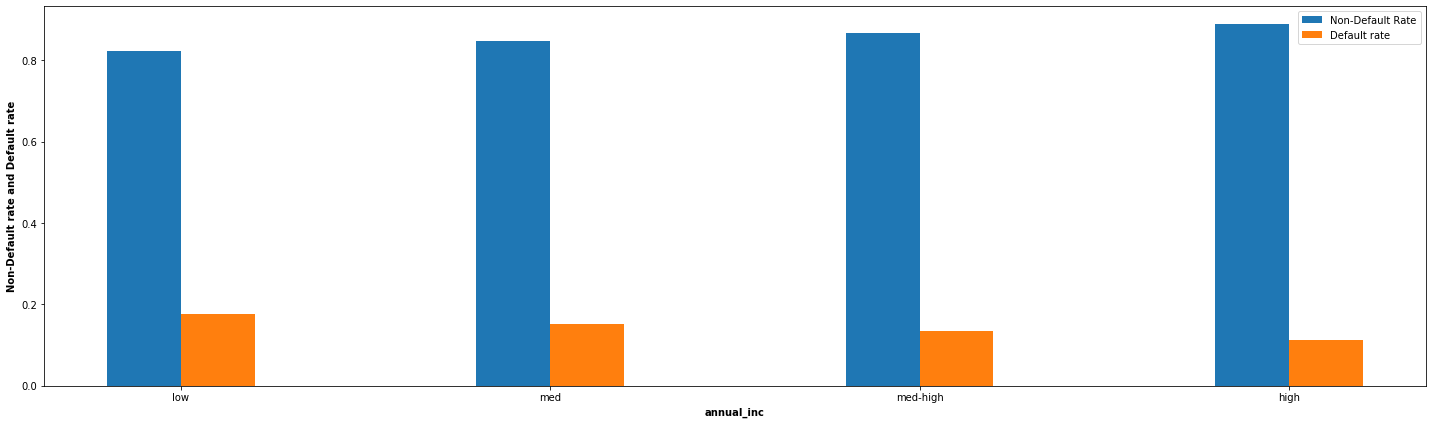

In [1028]:
# Plotting the non-default and default rate
data = [[annual_inc_low_default_rate[0], annual_inc_med_default_rate[0], annual_inc_med_high_default_rate[0], annual_inc_high_default_rate[0]],
[annual_inc_low_default_rate[1], annual_inc_med_default_rate[1], annual_inc_med_high_default_rate[1], annual_inc_high_default_rate[1]]]
fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('annual_inc', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1029]:
# Computing the default and non-default rate for term-36-months
annual_inc_low_term36 = annual_inc_low[annual_inc_low['term']==36]
annual_inc_med_term36 = annual_inc_med[annual_inc_med['term']==36]
annual_inc_med_high_term36 = annual_inc_med_high[annual_inc_med_high['term']==36]
annual_inc_high_term36 = annual_inc_high[annual_inc_high['term']==36]

annual_inc_low_term36_counts = annual_inc_low_term36['loan_status'].value_counts()
annual_inc_low_term36_counts_sum = annual_inc_low_term36_counts.sum()
annual_inc_low_term36_default_rate = annual_inc_low_term36_counts / annual_inc_low_term36_counts_sum

annual_inc_med_term36_counts = annual_inc_med_term36['loan_status'].value_counts()
annual_inc_med_term36_counts_sum = annual_inc_med_term36_counts.sum()
annual_inc_med_term36_default_rate = annual_inc_med_term36_counts / annual_inc_med_term36_counts_sum

annual_inc_med_high_term36_counts = annual_inc_med_high_term36['loan_status'].value_counts()
annual_inc_med_high_term36_counts_sum = annual_inc_med_high_term36_counts.sum()
annual_inc_med_high_term36_default_rate = annual_inc_med_high_term36_counts / annual_inc_med_high_term36_counts_sum

annual_inc_high_term36_counts = annual_inc_high_term36['loan_status'].value_counts()
annual_inc_high_term36_counts_sum = annual_inc_high_term36_counts.sum()
annual_inc_high_term36_default_rate = annual_inc_high_term36_counts / annual_inc_high_term36_counts_sum

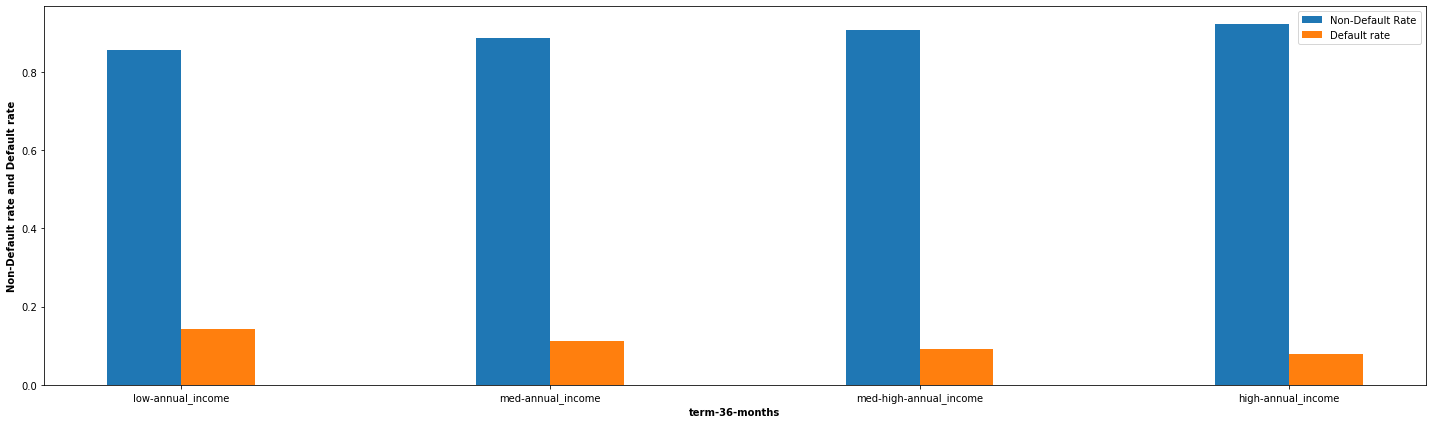

In [1030]:
# Plotting the non-default and default rate for term-36-months
data = [[annual_inc_low_term36_default_rate[0], annual_inc_med_term36_default_rate[0], annual_inc_med_high_term36_default_rate[0], annual_inc_high_term36_default_rate[0]],
[annual_inc_low_term36_default_rate[1], annual_inc_med_term36_default_rate[1], annual_inc_med_high_term36_default_rate[1], annual_inc_high_term36_default_rate[1]]]
fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-36-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low-annual_income', 'med-annual_income', 'med-high-annual_income', 'high-annual_income'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()



In [1031]:
# Computing the default and non-default rate for term-60-months
annual_inc_low_term60 = annual_inc_low[annual_inc_low['term']==60]
annual_inc_med_term60 = annual_inc_med[annual_inc_med['term']==60]
annual_inc_med_high_term60 = annual_inc_med_high[annual_inc_med_high['term']==60]
annual_inc_high_term60 = annual_inc_high[annual_inc_high['term']==60]

annual_inc_low_term60_counts = annual_inc_low_term60['loan_status'].value_counts()
annual_inc_low_term60_counts_sum = annual_inc_low_term60_counts.sum()
annual_inc_low_term60_default_rate = annual_inc_low_term60_counts / annual_inc_low_term60_counts_sum

annual_inc_med_term60_counts = annual_inc_med_term60['loan_status'].value_counts()
annual_inc_med_term60_counts_sum = annual_inc_med_term60_counts.sum()
annual_inc_med_term60_default_rate = annual_inc_med_term60_counts / annual_inc_med_term60_counts_sum

annual_inc_med_high_term60_counts = annual_inc_med_high_term60['loan_status'].value_counts()
annual_inc_med_high_term60_counts_sum = annual_inc_med_high_term60_counts.sum()
annual_inc_med_high_term60_default_rate = annual_inc_med_high_term60_counts / annual_inc_med_high_term60_counts_sum

annual_inc_high_term60_counts = annual_inc_high_term60['loan_status'].value_counts()
annual_inc_high_term60_counts_sum = annual_inc_high_term60_counts.sum()
annual_inc_high_term60_default_rate = annual_inc_high_term60_counts / annual_inc_high_term60_counts_sum

annual_inc_low_term60_default_rate

Fully Paid    0.68
Charged Off   0.32
Name: loan_status, dtype: float64

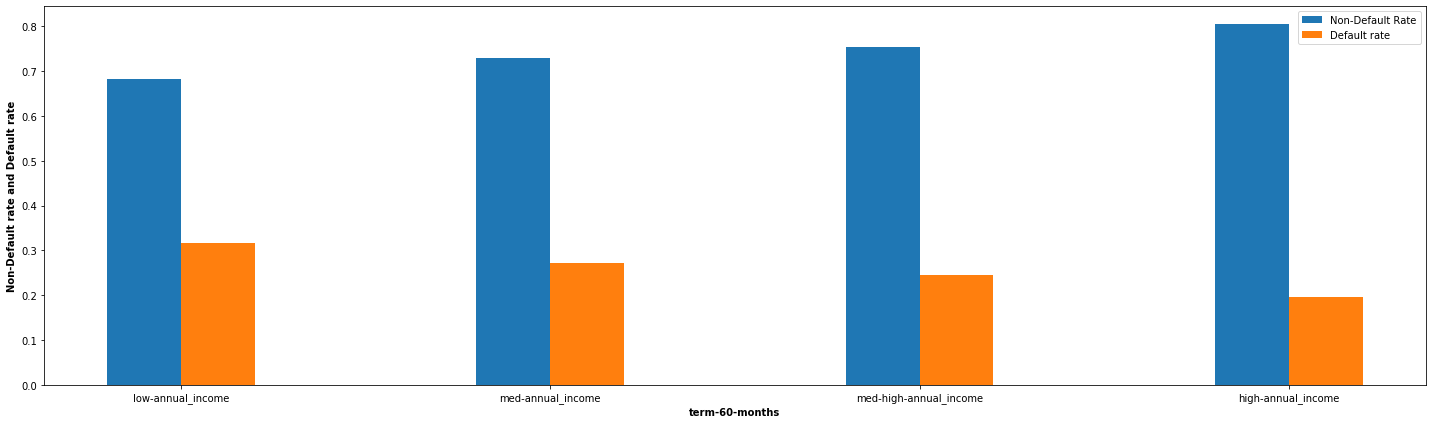

In [1032]:
# Plotting the non-default and default rate for term-60-months
data = [[annual_inc_low_term60_default_rate[0], annual_inc_med_term60_default_rate[0], annual_inc_med_high_term60_default_rate[0], annual_inc_high_term60_default_rate[0]],
[annual_inc_low_term60_default_rate[1], annual_inc_med_term60_default_rate[1], annual_inc_med_high_term60_default_rate[1], annual_inc_high_term60_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-60-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low-annual_income', 'med-annual_income', 'med-high-annual_income', 'high-annual_income'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

################################
########## interest_rate ##########
################################

In [1033]:
# Showing the statistical values of the variable
lending_1.int_rate.describe()

count   37544.00
mean       11.96
std         3.68
min         5.42
25%         8.94
50%        11.83
75%        14.42
max        24.40
Name: int_rate, dtype: float64

#### No. of loan given to people with low, medium, medium-high and high int_rate
1) low - upto 8.5% <br />
2) Medium - from 8.5% upto 12% <br />
3) Medium-High - from 12% upto 15% <br />
4) High - above 15% <br />


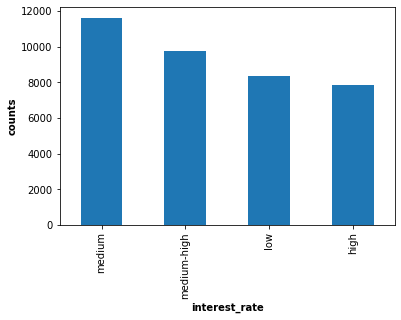

In [1034]:
# Plotting the counts of the range
lending_1['int_rate_1'] = np.nan
lending_1['int_rate_1'] = np.where((lending_1['int_rate'] >= 0) & (lending_1['int_rate'] <= 8.5),'low',lending_1['int_rate_1'])
lending_1['int_rate_1'] = np.where((lending_1['int_rate'] > 8.5) & (lending_1['int_rate'] <= 12),'medium',lending_1['int_rate_1'])
lending_1['int_rate_1'] = np.where((lending_1['int_rate'] > 12) & (lending_1['int_rate'] <= 15),'medium-high',lending_1['int_rate_1'])
lending_1['int_rate_1'] = np.where((lending_1['int_rate'] > 15),'high',lending_1['int_rate_1'])
plt.ylabel('counts', fontweight ='bold') 
pd.value_counts(lending_1['int_rate_1']).plot.bar()
plt.xlabel('interest_rate', fontweight ='bold')
plt.show()


In [1035]:
# Computing the default and non-default rate
int_rate_low = lending_1[lending_1['int_rate_1']=='low']
int_rate_med = lending_1[lending_1['int_rate_1']=='medium']
int_rate_med_high = lending_1[lending_1['int_rate_1']=='medium-high']
int_rate_high = lending_1[lending_1['int_rate_1']=='high']

int_rate_low_counts = int_rate_low['loan_status'].value_counts()
int_rate_low_counts_sum = int_rate_low_counts.sum()
int_rate_low_default_rate = int_rate_low_counts / int_rate_low_counts_sum

int_rate_med_counts = int_rate_med['loan_status'].value_counts()
int_rate_med_counts_sum = int_rate_med_counts.sum()
int_rate_med_default_rate = int_rate_med_counts / int_rate_med_counts_sum

int_rate_med_high_counts = int_rate_med_high['loan_status'].value_counts()
int_rate_med_high_counts_sum = int_rate_med_high_counts.sum()
int_rate_med_high_default_rate = int_rate_med_high_counts / int_rate_med_high_counts_sum

int_rate_high_counts = int_rate_high['loan_status'].value_counts()
int_rate_high_counts_sum = int_rate_high_counts.sum()
int_rate_high_default_rate = int_rate_high_counts / int_rate_high_counts_sum


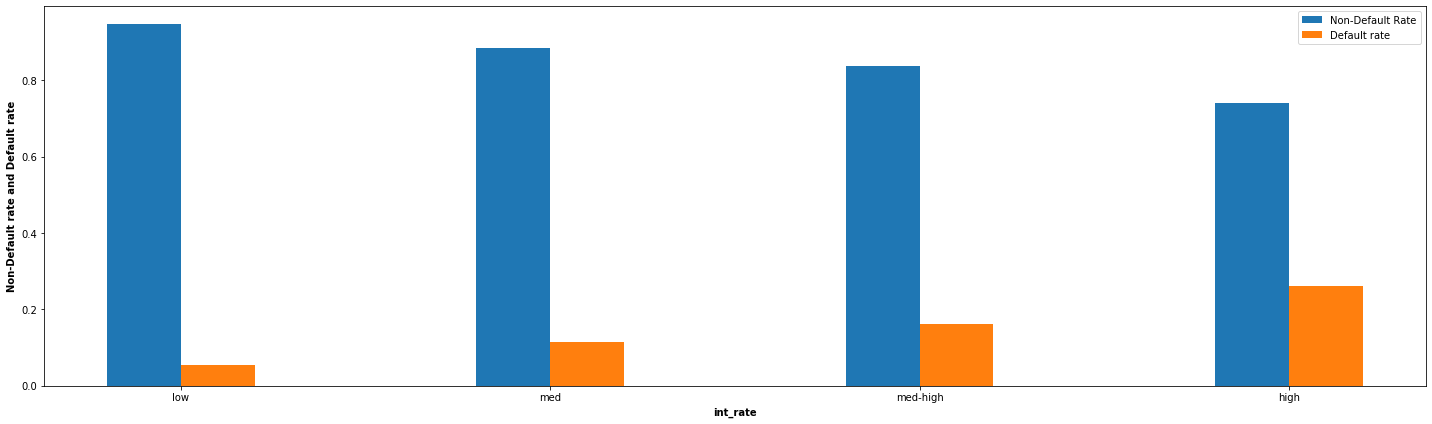

In [1036]:
# Plotting the non-default and default rate
data = [[int_rate_low_default_rate[0], int_rate_med_default_rate[0], int_rate_med_high_default_rate[0], int_rate_high_default_rate[0]],
[int_rate_low_default_rate[1], int_rate_med_default_rate[1], int_rate_med_high_default_rate[1], int_rate_high_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('int_rate', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1037]:
# Computing the default and non-default rate for term-36-months
int_rate_low_term36 = int_rate_low[int_rate_low['term']==36]
int_rate_med_term36 = int_rate_med[int_rate_med['term']==36]
int_rate_med_high_term36 = int_rate_med_high[int_rate_med_high['term']==36]
int_rate_high_term36 = int_rate_high[int_rate_high['term']==36]

int_rate_low_term36_counts = int_rate_low_term36['loan_status'].value_counts()
int_rate_low_term36_counts_sum = int_rate_low_term36_counts.sum()
int_rate_low_term36_default_rate = int_rate_low_term36_counts / int_rate_low_term36_counts_sum

int_rate_med_term36_counts = int_rate_med_term36['loan_status'].value_counts()
int_rate_med_term36_counts_sum = int_rate_med_term36_counts.sum()
int_rate_med_term36_default_rate = int_rate_med_term36_counts / int_rate_med_term36_counts_sum

int_rate_med_high_term36_counts = int_rate_med_high_term36['loan_status'].value_counts()
int_rate_med_high_term36_counts_sum = int_rate_med_high_term36_counts.sum()
int_rate_med_high_term36_default_rate = int_rate_med_high_term36_counts / int_rate_med_high_term36_counts_sum

int_rate_high_term36_counts = int_rate_high_term36['loan_status'].value_counts()
int_rate_high_term36_counts_sum = int_rate_high_term36_counts.sum()
int_rate_high_term36_default_rate = int_rate_high_term36_counts / int_rate_high_term36_counts_sum

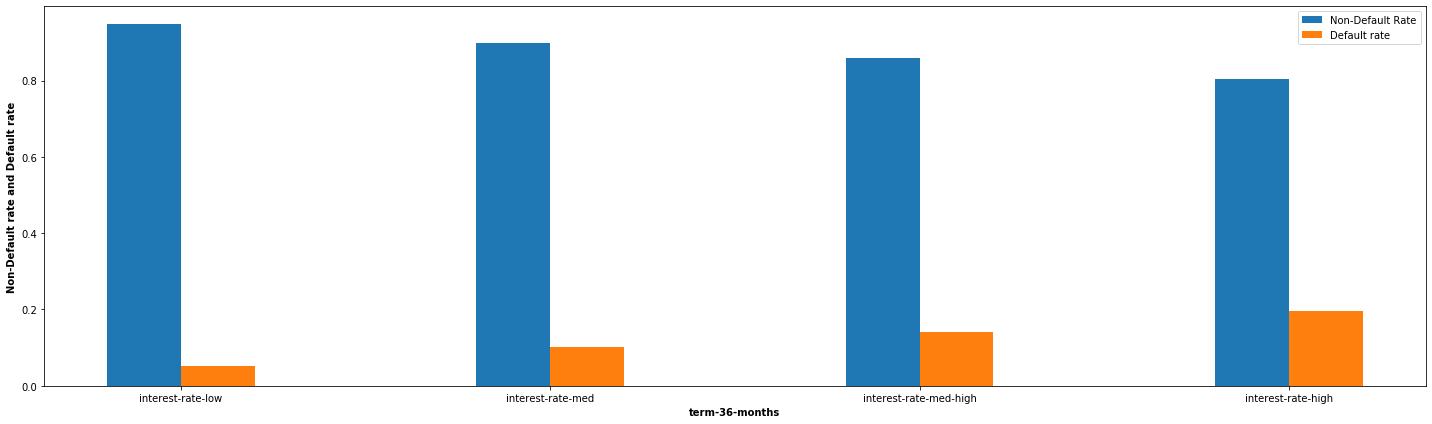

In [1038]:
# Computing the default and non-default rate for term-36-months
data = [[int_rate_low_term36_default_rate[0], int_rate_med_term36_default_rate[0], int_rate_med_high_term36_default_rate[0], int_rate_high_term36_default_rate[0]],
[int_rate_low_term36_default_rate[1], int_rate_med_term36_default_rate[1], int_rate_med_high_term36_default_rate[1], int_rate_high_term36_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-36-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['interest-rate-low', 'interest-rate-med', 'interest-rate-med-high', 'interest-rate-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

In [1039]:
# Computing the default and non-default rate for term-60-months
int_rate_low_term60 = int_rate_low[int_rate_low['term']==60]
int_rate_med_term60 = int_rate_med[int_rate_med['term']==60]
int_rate_med_high_term60 = int_rate_med_high[int_rate_med_high['term']==60]
int_rate_high_term60 = int_rate_high[int_rate_high['term']==60]

int_rate_low_term60_counts = int_rate_low_term60['loan_status'].value_counts()
int_rate_low_term60_counts_sum = int_rate_low_term60_counts.sum()
int_rate_low_term60_default_rate = int_rate_low_term60_counts / int_rate_low_term60_counts_sum

int_rate_med_term60_counts = int_rate_med_term60['loan_status'].value_counts()
int_rate_med_term60_counts_sum = int_rate_med_term60_counts.sum()
int_rate_med_term60_default_rate = int_rate_med_term60_counts / int_rate_med_term60_counts_sum

int_rate_med_high_term60_counts = int_rate_med_high_term60['loan_status'].value_counts()
int_rate_med_high_term60_counts_sum = int_rate_med_high_term60_counts.sum()
int_rate_med_high_term60_default_rate = int_rate_med_high_term60_counts / int_rate_med_high_term60_counts_sum

int_rate_high_term60_counts = int_rate_high_term60['loan_status'].value_counts()
int_rate_high_term60_counts_sum = int_rate_high_term60_counts.sum()
int_rate_high_term60_default_rate = int_rate_high_term60_counts / int_rate_high_term60_counts_sum


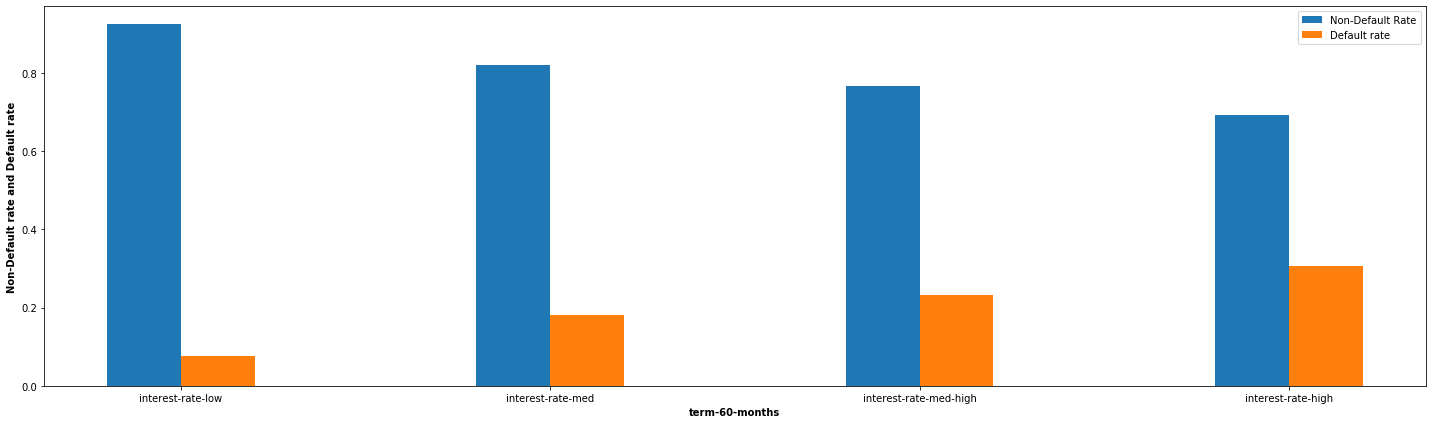

In [1040]:
# Plotting the non-default and default rate for term-60-months
data = [[int_rate_low_term60_default_rate[0], int_rate_med_term60_default_rate[0], int_rate_med_high_term60_default_rate[0], int_rate_high_term60_default_rate[0]],
[int_rate_low_term60_default_rate[1], int_rate_med_term60_default_rate[1], int_rate_med_high_term60_default_rate[1], int_rate_high_term60_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-60-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['interest-rate-low', 'interest-rate-med', 'interest-rate-med-high', 'interest-rate-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
########## Loan_amnt ##########
################################

In [1041]:
# Showing the statistical values of the variable
lending_1.loan_amnt.describe()

count   37544.00
mean    11119.33
std      7354.10
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

#### No. of loan given to people with low, medium, medium-high and high loan_amnt
1) low - upto 5000 <br />
2) Medium - from 5000 upto 10500 <br />
3) Medium-High - from 10500 upto 15000 <br />
4) High - above 15000 <br />

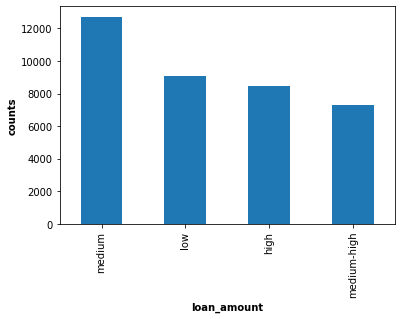

In [1042]:
# Plotting the counts of the range
lending_1['loan_amnt_1'] = np.nan
lending_1['loan_amnt_1'] = np.where((lending_1['loan_amnt'] >= 0) & (lending_1['loan_amnt'] <= 5000),'low',lending_1['loan_amnt_1'])
lending_1['loan_amnt_1'] = np.where((lending_1['loan_amnt'] > 5000) & (lending_1['loan_amnt'] <= 10500),'medium',lending_1['loan_amnt_1'])
lending_1['loan_amnt_1'] = np.where((lending_1['loan_amnt'] > 10500) & (lending_1['loan_amnt'] <= 15000),'medium-high',lending_1['loan_amnt_1'])
lending_1['loan_amnt_1'] = np.where((lending_1['loan_amnt'] > 15000),'high',lending_1['loan_amnt_1'])
plt.ylabel('counts', fontweight ='bold') 
pd.value_counts(lending_1['loan_amnt_1']).plot.bar()
plt.xlabel('loan_amount', fontweight ='bold')
plt.show()


In [1043]:
# Computing the default and non-default rate
loan_amnt_low = lending_1[lending_1['loan_amnt_1']=='low']
loan_amnt_med = lending_1[lending_1['loan_amnt_1']=='medium']
loan_amnt_med_high = lending_1[lending_1['loan_amnt_1']=='medium-high']
loan_amnt_high = lending_1[lending_1['loan_amnt_1']=='high']

loan_amnt_low_counts = loan_amnt_low['loan_status'].value_counts()
loan_amnt_low_counts_sum = loan_amnt_low_counts.sum()
loan_amnt_low_default_rate = loan_amnt_low_counts / loan_amnt_low_counts_sum

loan_amnt_med_counts = loan_amnt_med['loan_status'].value_counts()
loan_amnt_med_counts_sum = loan_amnt_med_counts.sum()
loan_amnt_med_default_rate = loan_amnt_med_counts / loan_amnt_med_counts_sum

loan_amnt_med_high_counts = loan_amnt_med_high['loan_status'].value_counts()
loan_amnt_med_high_counts_sum = loan_amnt_med_high_counts.sum()
loan_amnt_med_high_default_rate = loan_amnt_med_high_counts / loan_amnt_med_high_counts_sum

loan_amnt_high_counts = loan_amnt_high['loan_status'].value_counts()
loan_amnt_high_counts_sum = loan_amnt_high_counts.sum()
loan_amnt_high_default_rate = loan_amnt_high_counts / loan_amnt_high_counts_sum


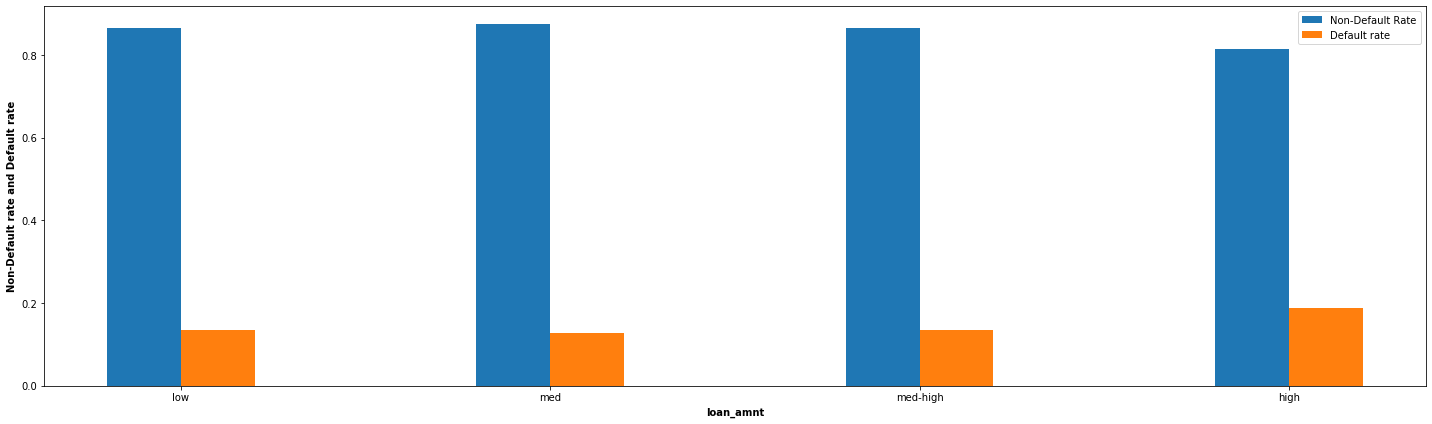

In [1044]:
# Plotting the non-default and default rate
data = [[loan_amnt_low_default_rate[0], loan_amnt_med_default_rate[0], loan_amnt_med_high_default_rate[0], loan_amnt_high_default_rate[0]],
[loan_amnt_low_default_rate[1], loan_amnt_med_default_rate[1], loan_amnt_med_high_default_rate[1], loan_amnt_high_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('loan_amnt', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1045]:
# Computing the default and non-default rate for term-36-months
loan_amnt_low_term36 = loan_amnt_low[loan_amnt_low['term']==36]
loan_amnt_med_term36 = loan_amnt_med[loan_amnt_med['term']==36]
loan_amnt_med_high_term36 = loan_amnt_med_high[loan_amnt_med_high['term']==36]
loan_amnt_high_term36 = loan_amnt_high[loan_amnt_high['term']==36]

loan_amnt_low_term36_counts = loan_amnt_low_term36['loan_status'].value_counts()
loan_amnt_low_term36_counts_sum = loan_amnt_low_term36_counts.sum()
loan_amnt_low_term36_default_rate = loan_amnt_low_term36_counts / loan_amnt_low_term36_counts_sum

loan_amnt_med_term36_counts = loan_amnt_med_term36['loan_status'].value_counts()
loan_amnt_med_term36_counts_sum = loan_amnt_med_term36_counts.sum()
loan_amnt_med_term36_default_rate = loan_amnt_med_term36_counts / loan_amnt_med_term36_counts_sum

loan_amnt_med_high_term36_counts = loan_amnt_med_high_term36['loan_status'].value_counts()
loan_amnt_med_high_term36_counts_sum = loan_amnt_med_high_term36_counts.sum()
loan_amnt_med_high_term36_default_rate = loan_amnt_med_high_term36_counts / loan_amnt_med_high_term36_counts_sum

loan_amnt_high_term36_counts = loan_amnt_high_term36['loan_status'].value_counts()
loan_amnt_high_term36_counts_sum = loan_amnt_high_term36_counts.sum()
loan_amnt_high_term36_default_rate = loan_amnt_high_term36_counts / loan_amnt_high_term36_counts_sum

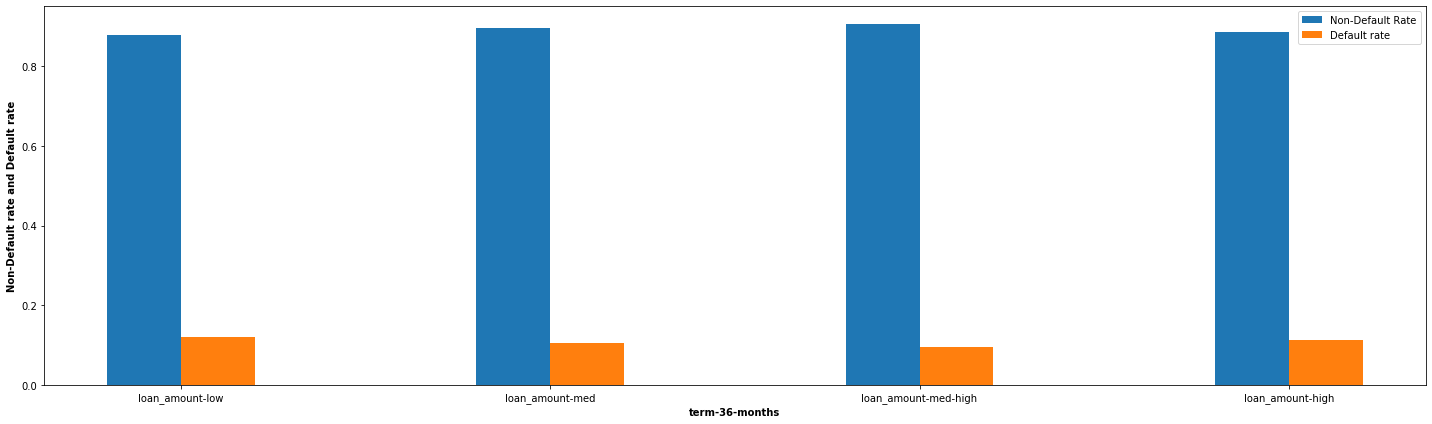

In [1046]:
# Plotting the non-default and default rate for term-36-months
data = [[loan_amnt_low_term36_default_rate[0], loan_amnt_med_term36_default_rate[0], loan_amnt_med_high_term36_default_rate[0], loan_amnt_high_term36_default_rate[0]],
[loan_amnt_low_term36_default_rate[1], loan_amnt_med_term36_default_rate[1], loan_amnt_med_high_term36_default_rate[1], loan_amnt_high_term36_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-36-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['loan_amount-low', 'loan_amount-med', 'loan_amount-med-high', 'loan_amount-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

In [1047]:
# Computing the default and non-default rate for term-60-months
loan_amnt_low_term60 = loan_amnt_low[loan_amnt_low['term']==60]
loan_amnt_med_term60 = loan_amnt_med[loan_amnt_med['term']==60]
loan_amnt_med_high_term60 = loan_amnt_med_high[loan_amnt_med_high['term']==60]
loan_amnt_high_term60 = loan_amnt_high[loan_amnt_high['term']==60]

loan_amnt_low_term60_counts = loan_amnt_low_term60['loan_status'].value_counts()
loan_amnt_low_term60_counts_sum = loan_amnt_low_term60_counts.sum()
loan_amnt_low_term60_default_rate = loan_amnt_low_term60_counts / loan_amnt_low_term60_counts_sum

loan_amnt_med_term60_counts = loan_amnt_med_term60['loan_status'].value_counts()
loan_amnt_med_term60_counts_sum = loan_amnt_med_term60_counts.sum()
loan_amnt_med_term60_default_rate = loan_amnt_med_term60_counts / loan_amnt_med_term60_counts_sum

loan_amnt_med_high_term60_counts = loan_amnt_med_high_term60['loan_status'].value_counts()
loan_amnt_med_high_term60_counts_sum = loan_amnt_med_high_term60_counts.sum()
loan_amnt_med_high_term60_default_rate = loan_amnt_med_high_term60_counts / loan_amnt_med_high_term60_counts_sum

loan_amnt_high_term60_counts = loan_amnt_high_term60['loan_status'].value_counts()
loan_amnt_high_term60_counts_sum = loan_amnt_high_term60_counts.sum()
loan_amnt_high_term60_default_rate = loan_amnt_high_term60_counts / loan_amnt_high_term60_counts_sum


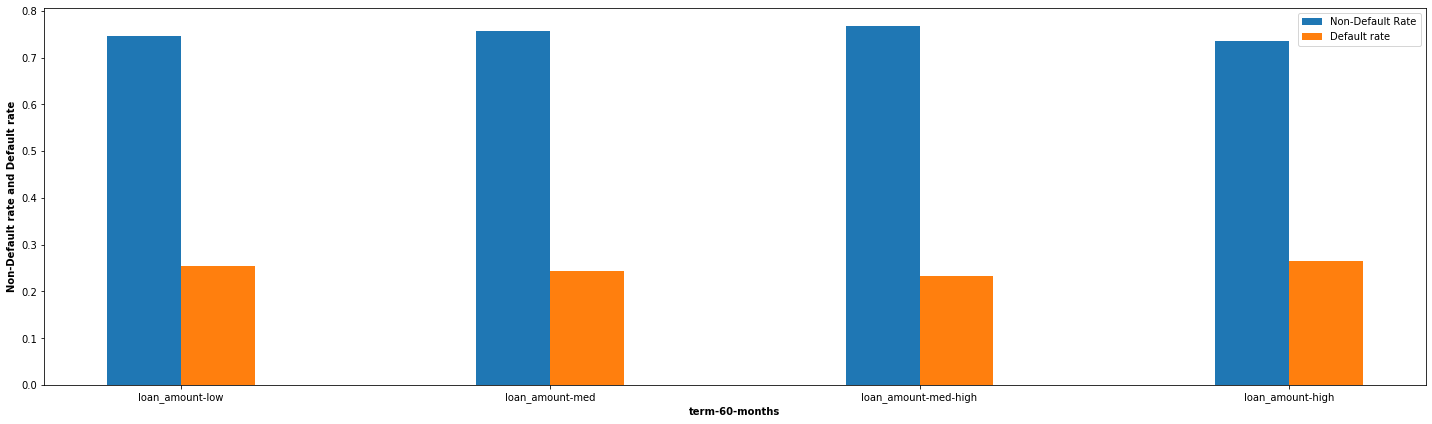

In [1048]:
# Plotting the non-default and default rate for term-60-months
data = [[loan_amnt_low_term60_default_rate[0], loan_amnt_med_term60_default_rate[0], loan_amnt_med_high_term60_default_rate[0], loan_amnt_high_term60_default_rate[0]],
[loan_amnt_low_term60_default_rate[1], loan_amnt_med_term60_default_rate[1], loan_amnt_med_high_term60_default_rate[1], loan_amnt_high_term60_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-60-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['loan_amount-low', 'loan_amount-med', 'loan_amount-med-high', 'loan_amount-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
########## grade ##########
################################

In [1049]:
# Showing the unique values of the variable
lending_1.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

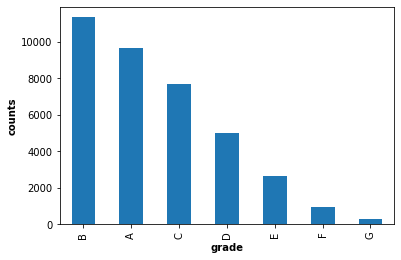

In [1050]:
# Plotting bar chart of counts of the unique values in the variable
pd.value_counts(lending_1['grade']).plot.bar()
plt.xlabel('grade', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()

In [1051]:
# Computing the default and non-default rate
grade_A = lending_1[lending_1['grade']=='A']
grade_B = lending_1[lending_1['grade']=='B']
grade_C = lending_1[lending_1['grade']=='C']
grade_D = lending_1[lending_1['grade']=='D']
grade_E = lending_1[lending_1['grade']=='E']
grade_F = lending_1[lending_1['grade']=='F']
grade_G = lending_1[lending_1['grade']=='G']

grade_A_counts = grade_A['loan_status'].value_counts()
grade_A_counts_sum = grade_A_counts.sum()
grade_A_default_rate = grade_A_counts / grade_A_counts_sum

grade_B_counts = grade_B['loan_status'].value_counts()
grade_B_counts_sum = grade_B_counts.sum()
grade_B_default_rate = grade_B_counts / grade_B_counts_sum

grade_C_counts = grade_C['loan_status'].value_counts()
grade_C_counts_sum = grade_C_counts.sum()
grade_C_default_rate = grade_C_counts / grade_C_counts_sum

grade_D_counts = grade_D['loan_status'].value_counts()
grade_D_counts_sum = grade_D_counts.sum()
grade_D_default_rate = grade_D_counts / grade_D_counts_sum

grade_E_counts = grade_E['loan_status'].value_counts()
grade_E_counts_sum = grade_E_counts.sum()
grade_E_default_rate = grade_E_counts / grade_E_counts_sum

grade_F_counts = grade_F['loan_status'].value_counts()
grade_F_counts_sum = grade_F_counts.sum()
grade_F_default_rate = grade_F_counts / grade_F_counts_sum

grade_G_counts = grade_G['loan_status'].value_counts()
grade_G_counts_sum = grade_G_counts.sum()
grade_G_default_rate = grade_G_counts / grade_G_counts_sum

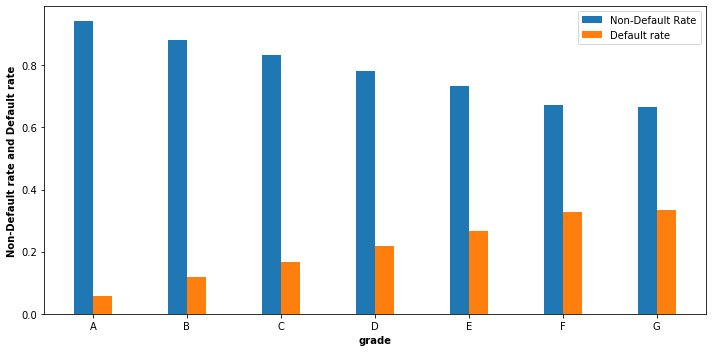

In [1052]:
# Plotting the non-default and default rate
data = [[grade_A_default_rate[0], grade_B_default_rate[0], grade_C_default_rate[0], grade_D_default_rate[0], grade_E_default_rate[0], grade_F_default_rate[0], grade_G_default_rate[0]],
[grade_A_default_rate[1], grade_B_default_rate[1], grade_C_default_rate[1], grade_D_default_rate[1], grade_E_default_rate[1], grade_F_default_rate[1], grade_G_default_rate[1]]]

fig = plt.subplots(figsize =(10, 5)) 

plt.xlabel('grade', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1053]:
# Computing the default and non-default rate for term-36-months
grade_A_term36 = grade_A[grade_A['term']==36]
grade_B_term36 = grade_B[grade_B['term']==36]
grade_C_term36 = grade_C[grade_C['term']==36]
grade_D_term36 = grade_D[grade_D['term']==36]
grade_E_term36 = grade_E[grade_E['term']==36]
grade_F_term36 = grade_F[grade_F['term']==36]
grade_G_term36 = grade_G[grade_G['term']==36]

grade_A_term36_counts = grade_A_term36['loan_status'].value_counts()
grade_A_term36_counts_sum = grade_A_term36_counts.sum()
grade_A_term36_default_rate = grade_A_term36_counts / grade_A_term36_counts_sum

grade_B_term36_counts = grade_B_term36['loan_status'].value_counts()
grade_B_term36_counts_sum = grade_B_term36_counts.sum()
grade_B_term36_default_rate = grade_B_term36_counts / grade_B_term36_counts_sum

grade_C_term36_counts = grade_C_term36['loan_status'].value_counts()
grade_C_term36_counts_sum = grade_C_term36_counts.sum()
grade_C_term36_default_rate = grade_C_term36_counts / grade_C_term36_counts_sum

grade_D_term36_counts = grade_D_term36['loan_status'].value_counts()
grade_D_term36_counts_sum = grade_D_term36_counts.sum()
grade_D_term36_default_rate = grade_D_term36_counts / grade_D_term36_counts_sum

grade_E_term36_counts = grade_E_term36['loan_status'].value_counts()
grade_E_term36_counts_sum = grade_E_term36_counts.sum()
grade_E_term36_default_rate = grade_E_term36_counts / grade_E_term36_counts_sum

grade_F_term36_counts = grade_F_term36['loan_status'].value_counts()
grade_F_term36_counts_sum = grade_F_term36_counts.sum()
grade_F_term36_default_rate = grade_F_term36_counts / grade_F_term36_counts_sum

grade_G_term36_counts = grade_G_term36['loan_status'].value_counts()
grade_G_term36_counts_sum = grade_G_term36_counts.sum()
grade_G_term36_default_rate = grade_G_term36_counts / grade_G_term36_counts_sum

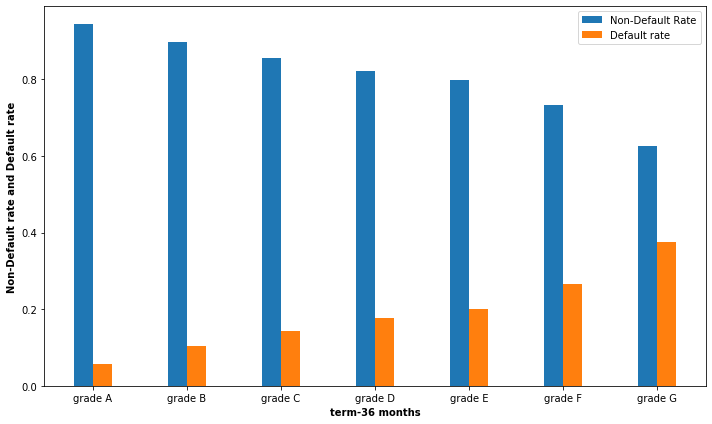

In [1054]:
# Plotting the non-default and default rate for term-36-months
data = [[grade_A_term36_default_rate[0], grade_B_term36_default_rate[0], grade_C_term36_default_rate[0], grade_D_term36_default_rate[0], grade_E_term36_default_rate[0], grade_F_term36_default_rate[0], grade_G_term36_default_rate[0]],
[grade_A_term36_default_rate[1], grade_B_term36_default_rate[1], grade_C_term36_default_rate[1], grade_D_term36_default_rate[1], grade_E_term36_default_rate[1], grade_F_term36_default_rate[1], grade_G_term36_default_rate[1]]]

fig = plt.subplots(figsize =(10, 6)) 

plt.xlabel('term-36 months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['grade A', 'grade B', 'grade C', 'grade D', 'grade E', 'grade F', 'grade G'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

In [1055]:
# Computing the default and non-default rate for term-60-months
grade_A_term60 = grade_A[grade_A['term']==60]
grade_B_term60 = grade_B[grade_B['term']==60]
grade_C_term60 = grade_C[grade_C['term']==60]
grade_D_term60 = grade_D[grade_D['term']==60]
grade_E_term60 = grade_E[grade_E['term']==60]
grade_F_term60 = grade_F[grade_F['term']==60]
grade_G_term60 = grade_G[grade_G['term']==60]

grade_A_term60_counts = grade_A_term60['loan_status'].value_counts()
grade_A_term60_counts_sum = grade_A_term60_counts.sum()
grade_A_term60_default_rate = grade_A_term60_counts / grade_A_term60_counts_sum

grade_B_term60_counts = grade_B_term60['loan_status'].value_counts()
grade_B_term60_counts_sum = grade_B_term60_counts.sum()
grade_B_term60_default_rate = grade_B_term60_counts / grade_B_term60_counts_sum

grade_C_term60_counts = grade_C_term60['loan_status'].value_counts()
grade_C_term60_counts_sum = grade_C_term60_counts.sum()
grade_C_term60_default_rate = grade_C_term60_counts / grade_C_term60_counts_sum

grade_D_term60_counts = grade_D_term60['loan_status'].value_counts()
grade_D_term60_counts_sum = grade_D_term60_counts.sum()
grade_D_term60_default_rate = grade_D_term60_counts / grade_D_term60_counts_sum

grade_E_term60_counts = grade_E_term60['loan_status'].value_counts()
grade_E_term60_counts_sum = grade_E_term60_counts.sum()
grade_E_term60_default_rate = grade_E_term60_counts / grade_E_term60_counts_sum

grade_F_term60_counts = grade_F_term60['loan_status'].value_counts()
grade_F_term60_counts_sum = grade_F_term60_counts.sum()
grade_F_term60_default_rate = grade_F_term60_counts / grade_F_term60_counts_sum

grade_G_term60_counts = grade_G_term60['loan_status'].value_counts()
grade_G_term60_counts_sum = grade_G_term60_counts.sum()
grade_G_term60_default_rate = grade_G_term60_counts / grade_G_term60_counts_sum


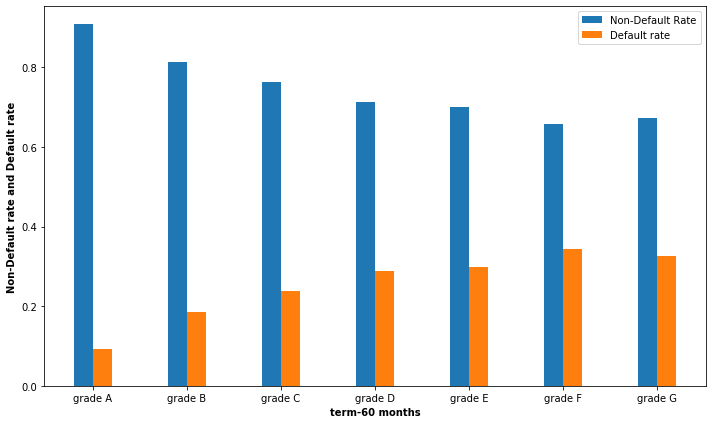

In [1056]:
# Plotting the non-default and default rate for term-60-months
data = [[grade_A_term60_default_rate[0], grade_B_term60_default_rate[0], grade_C_term60_default_rate[0], grade_D_term60_default_rate[0], grade_E_term60_default_rate[0], grade_F_term60_default_rate[0], grade_G_term60_default_rate[0]],
[grade_A_term60_default_rate[1], grade_B_term60_default_rate[1], grade_C_term60_default_rate[1], grade_D_term60_default_rate[1], grade_E_term60_default_rate[1], grade_F_term60_default_rate[1], grade_G_term60_default_rate[1]]]

fig = plt.subplots(figsize =(10, 6)) 

plt.xlabel('term-60 months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['grade A', 'grade B', 'grade C', 'grade D', 'grade E', 'grade F', 'grade G'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
########## purpose ##########
################################

In [1057]:
# Showing the unique values of the variable
lending_1.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

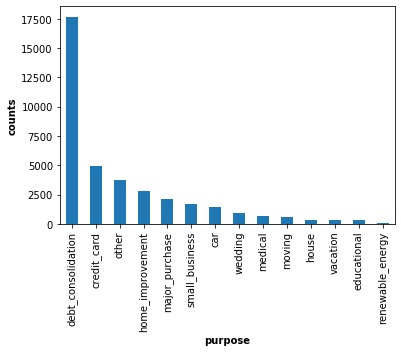

In [1058]:
# Plotting bar chart of counts of the unique values in the variable
pd.value_counts(lending_1['purpose']).plot.bar()
plt.xlabel('purpose', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()

In [1059]:
# Computing the default and non-default rate
purpose_car = lending_1[lending_1['purpose']=='car']
purpose_other = lending_1[lending_1['purpose']=='other']
purpose_wedding = lending_1[lending_1['purpose']=='wedding']
purpose_debt_consolidation = lending_1[lending_1['purpose']=='debt_consolidation']
purpose_credit_card = lending_1[lending_1['purpose']=='credit_card']
purpose_home_improvement = lending_1[lending_1['purpose']=='home_improvement']
purpose_major_purchase = lending_1[lending_1['purpose']=='major_purchase']
purpose_medical = lending_1[lending_1['purpose']=='medical']
purpose_moving = lending_1[lending_1['purpose']=='moving']
purpose_small_business = lending_1[lending_1['purpose']=='small_business']
purpose_vacation = lending_1[lending_1['purpose']=='vacation']
purpose_house = lending_1[lending_1['purpose']=='house']
purpose_renewable_energy = lending_1[lending_1['purpose']=='renewable_energy']
purpose_educational = lending_1[lending_1['purpose']=='educational']

purpose_car_counts = purpose_car['loan_status'].value_counts()
purpose_car_counts_sum = purpose_car_counts.sum()
purpose_car_default_rate = purpose_car_counts / purpose_car_counts_sum

purpose_other_counts = purpose_other['loan_status'].value_counts()
purpose_other_counts_sum = purpose_other_counts.sum()
purpose_other_default_rate = purpose_other_counts / purpose_other_counts_sum

purpose_wedding_counts = purpose_wedding['loan_status'].value_counts()
purpose_wedding_counts_sum = purpose_wedding_counts.sum()
purpose_wedding_default_rate = purpose_wedding_counts / purpose_wedding_counts_sum

purpose_debt_consolidation_counts = purpose_debt_consolidation['loan_status'].value_counts()
purpose_debt_consolidation_counts_sum = purpose_debt_consolidation_counts.sum()
purpose_debt_consolidation_default_rate = purpose_debt_consolidation_counts / purpose_debt_consolidation_counts_sum

purpose_credit_card_counts = purpose_credit_card['loan_status'].value_counts()
purpose_credit_card_counts_sum = purpose_credit_card_counts.sum()
purpose_credit_card_default_rate = purpose_credit_card_counts / purpose_credit_card_counts_sum

purpose_home_improvement_counts = purpose_home_improvement['loan_status'].value_counts()
purpose_home_improvement_counts_sum = purpose_home_improvement_counts.sum()
purpose_home_improvement_default_rate = purpose_home_improvement_counts / purpose_home_improvement_counts_sum

purpose_major_purchase_counts = purpose_major_purchase['loan_status'].value_counts()
purpose_major_purchase_counts_sum = purpose_major_purchase_counts.sum()
purpose_major_purchase_default_rate = purpose_major_purchase_counts / purpose_major_purchase_counts_sum

purpose_medical_counts = purpose_medical['loan_status'].value_counts()
purpose_medical_counts_sum = purpose_medical_counts.sum()
purpose_medical_default_rate = purpose_medical_counts / purpose_medical_counts_sum

purpose_moving_counts = purpose_moving['loan_status'].value_counts()
purpose_moving_counts_sum = purpose_moving_counts.sum()
purpose_moving_default_rate = purpose_moving_counts / purpose_moving_counts_sum

purpose_small_business_counts = purpose_small_business['loan_status'].value_counts()
purpose_small_business_counts_sum = purpose_small_business_counts.sum()
purpose_small_business_default_rate = purpose_small_business_counts / purpose_small_business_counts_sum

purpose_vacation_counts = purpose_vacation['loan_status'].value_counts()
purpose_vacation_counts_sum = purpose_vacation_counts.sum()
purpose_vacation_default_rate = purpose_vacation_counts / purpose_vacation_counts_sum

purpose_house_counts = purpose_house['loan_status'].value_counts()
purpose_house_counts_sum = purpose_house_counts.sum()
purpose_house_default_rate = purpose_house_counts / purpose_house_counts_sum

purpose_renewable_energy_counts = purpose_renewable_energy['loan_status'].value_counts()
purpose_renewable_energy_counts_sum = purpose_renewable_energy_counts.sum()
purpose_renewable_energy_default_rate = purpose_renewable_energy_counts / purpose_renewable_energy_counts_sum

purpose_educational_counts = purpose_educational['loan_status'].value_counts()
purpose_educational_counts_sum = purpose_educational_counts.sum()
purpose_educational_default_rate = purpose_educational_counts / purpose_educational_counts_sum


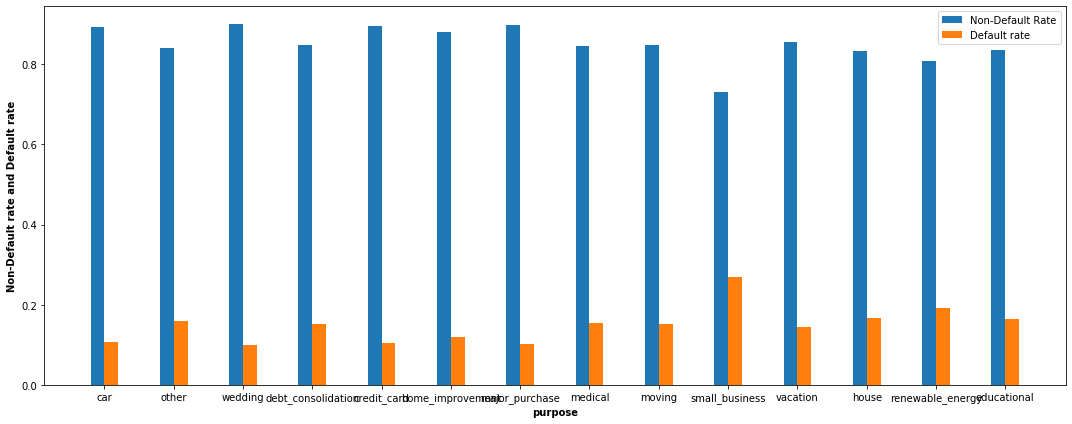

In [1060]:
# Plotting the non-default and default rate
data = [[purpose_car_default_rate[0], 
         purpose_other_default_rate[0], 
         purpose_wedding_default_rate[0], 
         purpose_debt_consolidation_default_rate[0],
         purpose_credit_card_default_rate[0], 
         purpose_home_improvement_default_rate[0], 
         purpose_major_purchase_default_rate[0],
         purpose_medical_default_rate[0], 
         purpose_moving_default_rate[0], 
         purpose_small_business_default_rate[0],
         purpose_vacation_default_rate[0], 
         purpose_house_default_rate[0], 
         purpose_renewable_energy_default_rate[0],
         purpose_educational_default_rate[0], 
        ],

        [purpose_car_default_rate[1], 
         purpose_other_default_rate[1], 
         purpose_wedding_default_rate[1], 
         purpose_debt_consolidation_default_rate[1],
         purpose_credit_card_default_rate[1], 
         purpose_home_improvement_default_rate[1], 
         purpose_major_purchase_default_rate[1],
         purpose_medical_default_rate[1], 
         purpose_moving_default_rate[1], 
         purpose_small_business_default_rate[1],
         purpose_vacation_default_rate[1], 
         purpose_house_default_rate[1], 
         purpose_renewable_energy_default_rate[1],
         purpose_educational_default_rate[1], 
        ]]

fig = plt.subplots(figsize =(15, 6)) 

plt.xlabel('purpose', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['car', 'other', 'wedding','debt_consolidation','credit_card','home_improvement','major_purchase','medical','moving','small_business','vacation','house','renewable_energy','educational'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

In [1061]:
# Top 5 categories from Purpose based on number of loans given
# 1) debt_consolidation, 2) credit_card, 3) other, 4) home_improvement, 5) major_purchase

# # Computing the default and non-default rate for term-36-months
purpose_debt_consolidation_term36 = purpose_debt_consolidation[purpose_debt_consolidation['term']==36]
purpose_credit_card_term36 = purpose_credit_card[purpose_credit_card['term']==36]
purpose_other_term36 = purpose_other[purpose_other['term']==36]
purpose_home_improvement_term36 = purpose_home_improvement[purpose_home_improvement['term']==36]
purpose_major_purchase_term36 = purpose_major_purchase[purpose_major_purchase['term']==36]

purpose_debt_consolidation_term36_counts = purpose_debt_consolidation_term36['loan_status'].value_counts()
purpose_debt_consolidation_term36_counts_sum = purpose_debt_consolidation_term36_counts.sum()
purpose_debt_consolidation_term36_default_rate = purpose_debt_consolidation_term36_counts / purpose_debt_consolidation_term36_counts_sum

purpose_credit_card_term36_counts = purpose_credit_card_term36['loan_status'].value_counts()
purpose_credit_card_term36_counts_sum = purpose_credit_card_term36_counts.sum()
purpose_credit_card_term36_default_rate = purpose_credit_card_term36_counts / purpose_credit_card_term36_counts_sum

purpose_other_term36_counts = purpose_other_term36['loan_status'].value_counts()
purpose_other_term36_counts_sum = purpose_other_term36_counts.sum()
purpose_other_term36_default_rate = purpose_other_term36_counts / purpose_other_term36_counts_sum

purpose_home_improvement_term36_counts = purpose_home_improvement_term36['loan_status'].value_counts()
purpose_home_improvement_term36_counts_sum = purpose_home_improvement_term36_counts.sum()
purpose_home_improvement_term36_default_rate = purpose_home_improvement_term36_counts / purpose_home_improvement_term36_counts_sum

purpose_major_purchase_term36_counts = purpose_major_purchase_term36['loan_status'].value_counts()
purpose_major_purchase_term36_counts_sum = purpose_major_purchase_term36_counts.sum()
purpose_major_purchase_term36_default_rate = purpose_major_purchase_term36_counts / purpose_major_purchase_term36_counts_sum



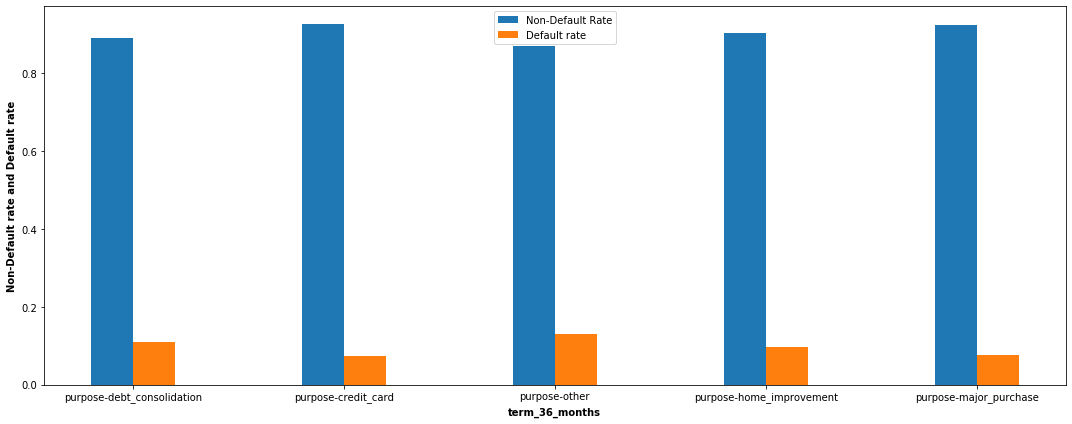

In [1062]:
# Plotting the non-default and default rate for term-36-months
data = [[purpose_debt_consolidation_term36_default_rate[0], 
         purpose_credit_card_term36_default_rate[0], 
         purpose_other_term36_default_rate[0], 
         purpose_home_improvement_term36_default_rate[0],
         purpose_major_purchase_term36_default_rate[0],
        ],
        
        [purpose_debt_consolidation_term36_default_rate[1], 
         purpose_credit_card_term36_default_rate[1], 
         purpose_other_term36_default_rate[1], 
         purpose_home_improvement_term36_default_rate[1],
         purpose_major_purchase_term36_default_rate[1],
        ],
        ]

fig = plt.subplots(figsize =(15, 6)) 

plt.xlabel('term_36_months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['purpose-debt_consolidation', 'purpose-credit_card', 'purpose-other','purpose-home_improvement','purpose-major_purchase'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

In [1063]:
# Top 5 categories from Purpose based on number of loans given
# 1) debt_consolidation, 2) credit_card, 3) other, 4) home_improvement, 5) major_purchase

# Computing the default and non-default rate for term-60-months

purpose_debt_consolidation_term60 = purpose_debt_consolidation[purpose_debt_consolidation['term']==60]
purpose_credit_card_term60 = purpose_credit_card[purpose_credit_card['term']==60]
purpose_other_term60 = purpose_other[purpose_other['term']==60]
purpose_home_improvement_term60 = purpose_home_improvement[purpose_home_improvement['term']==60]
purpose_major_purchase_term60 = purpose_major_purchase[purpose_major_purchase['term']==60]

purpose_debt_consolidation_term60_counts = purpose_debt_consolidation_term60['loan_status'].value_counts()
purpose_debt_consolidation_term60_counts_sum = purpose_debt_consolidation_term60_counts.sum()
purpose_debt_consolidation_term60_default_rate = purpose_debt_consolidation_term60_counts / purpose_debt_consolidation_term60_counts_sum

purpose_credit_card_term60_counts = purpose_credit_card_term60['loan_status'].value_counts()
purpose_credit_card_term60_counts_sum = purpose_credit_card_term60_counts.sum()
purpose_credit_card_term60_default_rate = purpose_credit_card_term60_counts / purpose_credit_card_term60_counts_sum

purpose_other_term60_counts = purpose_other_term60['loan_status'].value_counts()
purpose_other_term60_counts_sum = purpose_other_term60_counts.sum()
purpose_other_term60_default_rate = purpose_other_term60_counts / purpose_other_term60_counts_sum

purpose_home_improvement_term60_counts = purpose_home_improvement_term60['loan_status'].value_counts()
purpose_home_improvement_term60_counts_sum = purpose_home_improvement_term60_counts.sum()
purpose_home_improvement_term60_default_rate = purpose_home_improvement_term60_counts / purpose_home_improvement_term60_counts_sum

purpose_major_purchase_term60_counts = purpose_major_purchase_term60['loan_status'].value_counts()
purpose_major_purchase_term60_counts_sum = purpose_major_purchase_term60_counts.sum()
purpose_major_purchase_term60_default_rate = purpose_major_purchase_term60_counts / purpose_major_purchase_term60_counts_sum



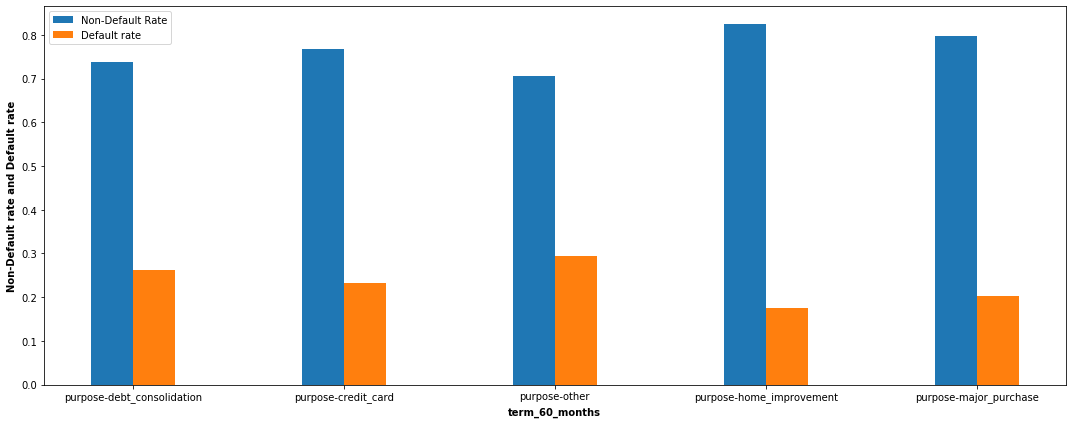

In [1064]:
# Plotting the non-default and default rate for term-60-months
data = [[purpose_debt_consolidation_term60_default_rate[0], 
         purpose_credit_card_term60_default_rate[0], 
         purpose_other_term60_default_rate[0], 
         purpose_home_improvement_term60_default_rate[0],
         purpose_major_purchase_term60_default_rate[0],
        ],
        
        [purpose_debt_consolidation_term60_default_rate[1], 
         purpose_credit_card_term60_default_rate[1], 
         purpose_other_term60_default_rate[1], 
         purpose_home_improvement_term60_default_rate[1],
         purpose_major_purchase_term60_default_rate[1],
        ]]

fig = plt.subplots(figsize =(15, 6)) 

plt.xlabel('term_60_months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['purpose-debt_consolidation', 'purpose-credit_card', 'purpose-other','purpose-home_improvement','purpose-major_purchase'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1065]:
################################
########## term ##########
################################

In [1066]:
# Showing the unique values of the variable
lending_1.term.unique()

array([36, 60])

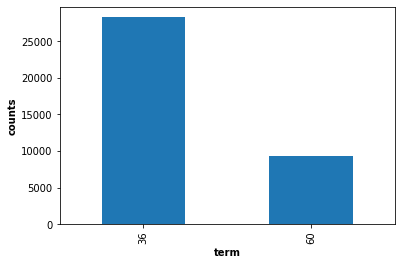

In [1067]:
# Plotting bar chart of counts of the unique values in the variable
pd.value_counts(lending_1['term']).plot.bar()
plt.xlabel('term', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()

In [1068]:
# Computing the default and non-default rate
term_36 = lending_1[lending_1['term']==36]
term_60 = lending_1[lending_1['term']==60]

term_36_counts = term_36['loan_status'].value_counts()
term_36_counts_sum = term_36_counts.sum()
term_36_default_rate = term_36_counts / term_36_counts_sum

term_60_counts = term_60['loan_status'].value_counts()
term_60_counts_sum = term_60_counts.sum()
term_60_default_rate = term_60_counts / term_60_counts_sum

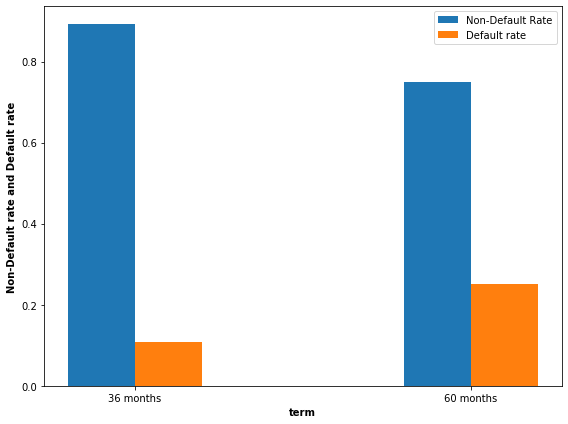

In [1069]:
# Plotting the non-default and default rate
data = [[term_36_default_rate[0], term_60_default_rate[0]], 
        [term_36_default_rate[1], term_60_default_rate[1]] ]

fig = plt.subplots(figsize =(8, 6)) 

plt.xlabel('term', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['36 months','60 months'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

################################
########## dti ##########
################################

In [1070]:
# Showing the statistical values of the variable
lending_1.dti.describe()

count   37544.00
mean       13.28
std         6.66
min         0.00
25%         8.16
50%        13.38
75%        18.55
max        29.99
Name: dti, dtype: float64

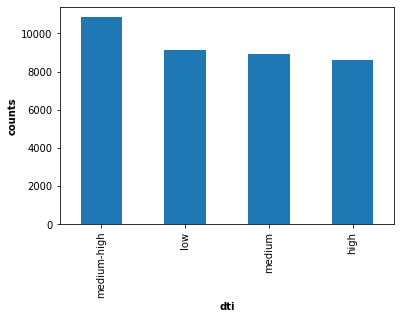

In [1071]:
# Plotting the counts of the range
lending_1['dti_1'] = np.nan
lending_1['dti_1'] = np.where((lending_1['dti'] >= 0) & (lending_1['dti'] <= 8),'low',lending_1['dti_1'])
lending_1['dti_1'] = np.where((lending_1['dti'] > 8) & (lending_1['dti'] <= 13),'medium',lending_1['dti_1'])
lending_1['dti_1'] = np.where((lending_1['dti'] > 13) & (lending_1['dti'] <= 19),'medium-high',lending_1['dti_1'])
lending_1['dti_1'] = np.where((lending_1['dti'] > 19),'high',lending_1['dti_1'])

pd.value_counts(lending_1['dti_1'])
pd.value_counts(lending_1['dti_1']).plot.bar()
plt.xlabel('dti', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()


In [1072]:
# Computing the default and non-default rate
dti_low = lending_1[lending_1['dti_1']=='low']
dti_med = lending_1[lending_1['dti_1']=='medium']
dti_med_high = lending_1[lending_1['dti_1']=='medium-high']
dti_high = lending_1[lending_1['dti_1']=='high']

dti_low_counts = dti_low['loan_status'].value_counts()
dti_low_counts_sum = dti_low_counts.sum()
dti_low_default_rate = dti_low_counts / dti_low_counts_sum

dti_med_counts = dti_med['loan_status'].value_counts()
dti_med_counts_sum = dti_med_counts.sum()
dti_med_default_rate = dti_med_counts / dti_med_counts_sum

dti_med_high_counts = dti_med_high['loan_status'].value_counts()
dti_med_high_counts_sum = dti_med_high_counts.sum()
dti_med_high_default_rate = dti_med_high_counts / dti_med_high_counts_sum

dti_high_counts = dti_high['loan_status'].value_counts()
dti_high_counts_sum = dti_high_counts.sum()
dti_high_default_rate = dti_high_counts / dti_high_counts_sum


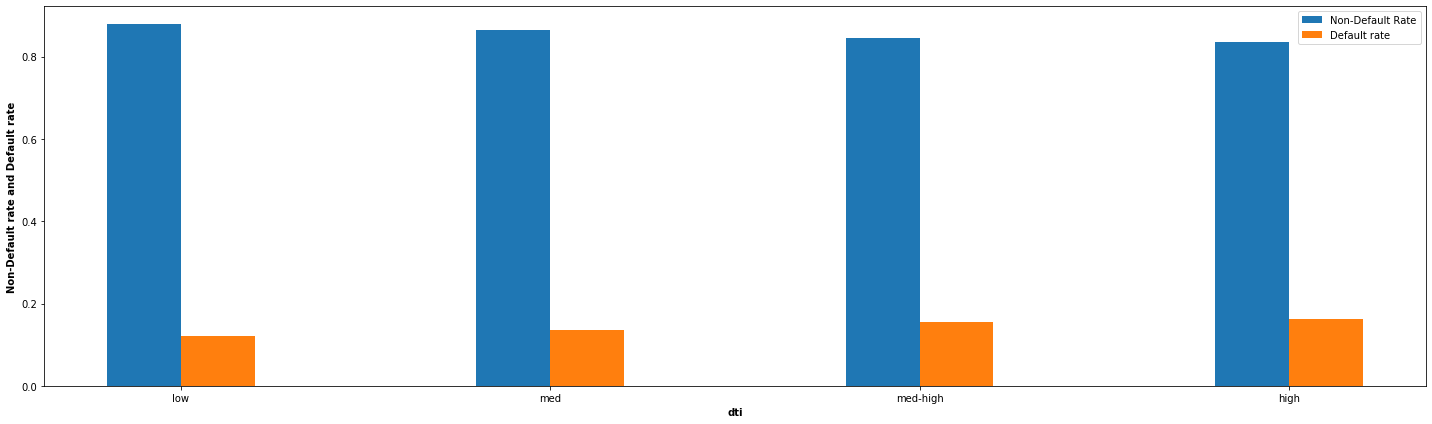

In [1073]:
# Plotting the non-default and default rate
data = [[dti_low_default_rate[0], dti_med_default_rate[0], dti_med_high_default_rate[0], dti_high_default_rate[0]],
[dti_low_default_rate[1], dti_med_default_rate[1], dti_med_high_default_rate[1], dti_high_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('dti', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1074]:
# Computing the default and non-default rate for term-36-months
dti_low_term36 = dti_low[dti_low['term']==36]
dti_med_term36 = dti_med[dti_med['term']==36]
dti_med_high_term36 = dti_med_high[dti_med_high['term']==36]
dti_high_term36 = dti_high[dti_high['term']==36]

dti_low_term36_counts = dti_low_term36['loan_status'].value_counts()
dti_low_term36_counts_sum = dti_low_term36_counts.sum()
dti_low_term36_default_rate = dti_low_term36_counts / dti_low_term36_counts_sum

dti_med_term36_counts = dti_med_term36['loan_status'].value_counts()
dti_med_term36_counts_sum = dti_med_term36_counts.sum()
dti_med_term36_default_rate = dti_med_term36_counts / dti_med_term36_counts_sum

dti_med_high_term36_counts = dti_med_high_term36['loan_status'].value_counts()
dti_med_high_term36_counts_sum = dti_med_high_term36_counts.sum()
dti_med_high_term36_default_rate = dti_med_high_term36_counts / dti_med_high_term36_counts_sum

dti_high_term36_counts = dti_high_term36['loan_status'].value_counts()
dti_high_term36_counts_sum = dti_high_term36_counts.sum()
dti_high_term36_default_rate = dti_high_term36_counts / dti_high_term36_counts_sum

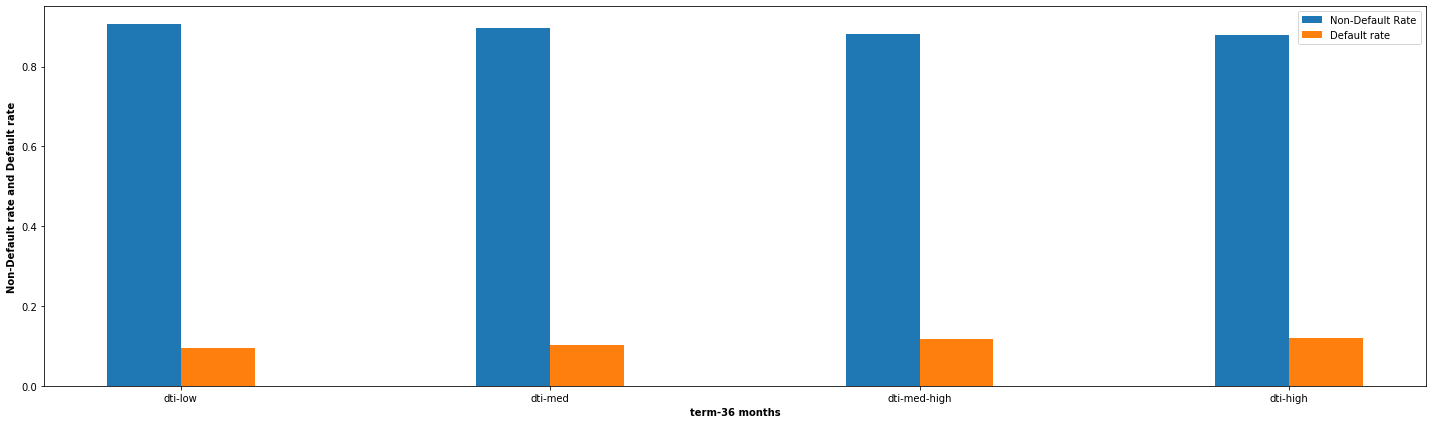

In [1075]:
# Plotting the non-default and default rate for term-36-months
data = [[dti_low_term36_default_rate[0], dti_med_term36_default_rate[0], dti_med_high_term36_default_rate[0], dti_high_term36_default_rate[0]],
[dti_low_term36_default_rate[1], dti_med_term36_default_rate[1], dti_med_high_term36_default_rate[1], dti_high_term36_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-36 months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['dti-low', 'dti-med', 'dti-med-high', 'dti-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1076]:
# Computing the default and non-default rate for term-60-months
dti_low_term60 = dti_low[dti_low['term']==60]
dti_med_term60 = dti_med[dti_med['term']==60]
dti_med_high_term60 = dti_med_high[dti_med_high['term']==60]
dti_high_term60 = dti_high[dti_high['term']==60]

dti_low_term60_counts = dti_low_term60['loan_status'].value_counts()
dti_low_term60_counts_sum = dti_low_term60_counts.sum()
dti_low_term60_default_rate = dti_low_term60_counts / dti_low_term60_counts_sum

dti_med_term60_counts = dti_med_term60['loan_status'].value_counts()
dti_med_term60_counts_sum = dti_med_term60_counts.sum()
dti_med_term60_default_rate = dti_med_term60_counts / dti_med_term60_counts_sum

dti_med_high_term60_counts = dti_med_high_term60['loan_status'].value_counts()
dti_med_high_term60_counts_sum = dti_med_high_term60_counts.sum()
dti_med_high_term60_default_rate = dti_med_high_term60_counts / dti_med_high_term60_counts_sum

dti_high_term60_counts = dti_high_term60['loan_status'].value_counts()
dti_high_term60_counts_sum = dti_high_term60_counts.sum()
dti_high_term60_default_rate = dti_high_term60_counts / dti_high_term60_counts_sum

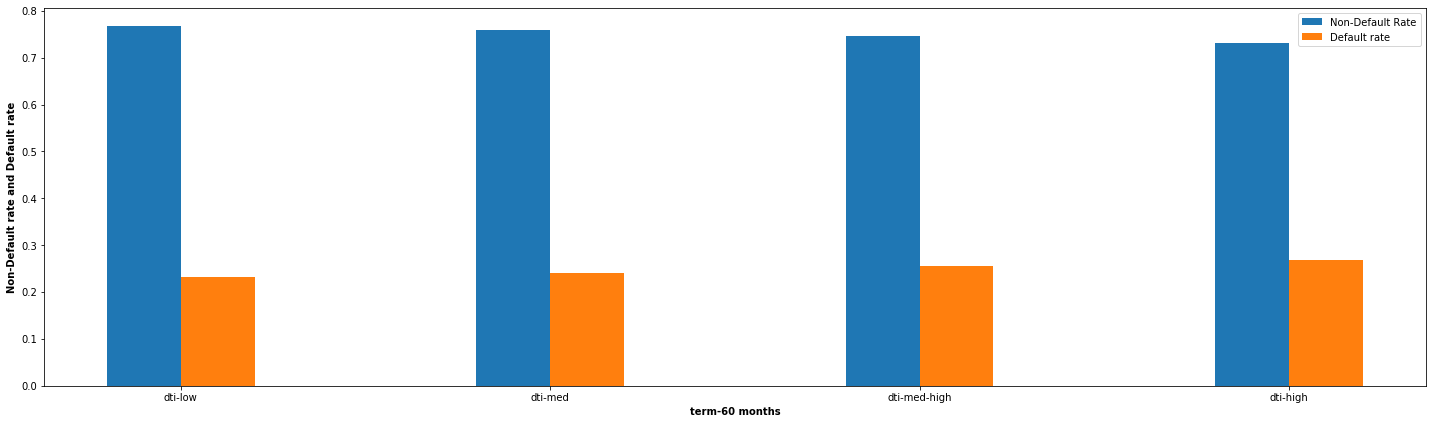

In [1077]:
# Plotting the non-default and default rate for term-60-months
data = [[dti_low_term60_default_rate[0], dti_med_term60_default_rate[0], dti_med_high_term60_default_rate[0], dti_high_term60_default_rate[0]],
[dti_low_term60_default_rate[1], dti_med_term60_default_rate[1], dti_med_high_term60_default_rate[1], dti_high_term60_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-60 months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['dti-low', 'dti-med', 'dti-med-high', 'dti-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
########## sub_grade ##########
################################

In [1078]:
# Showing the unique values of the variable
lending_1.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

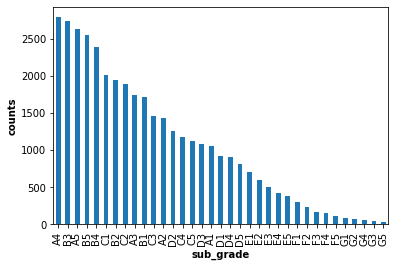

In [1079]:
# Plotting bar chart of counts of the unique values in the variable
pd.value_counts(lending_1['sub_grade']).plot.bar()
plt.xlabel('sub_grade', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()

In [1080]:
# Computing the default and non-default rate
sub_grade_A1 = lending_1[lending_1['sub_grade']=='A1']
sub_grade_B1 = lending_1[lending_1['sub_grade']=='B1']
sub_grade_C1 = lending_1[lending_1['sub_grade']=='C1']
sub_grade_D1 = lending_1[lending_1['sub_grade']=='D1']
sub_grade_E1 = lending_1[lending_1['sub_grade']=='E1']
sub_grade_F1 = lending_1[lending_1['sub_grade']=='F1']
sub_grade_G1 = lending_1[lending_1['sub_grade']=='G1']

sub_grade_A2 = lending_1[lending_1['sub_grade']=='A2']
sub_grade_B2 = lending_1[lending_1['sub_grade']=='B2']
sub_grade_C2 = lending_1[lending_1['sub_grade']=='C2']
sub_grade_D2 = lending_1[lending_1['sub_grade']=='D2']
sub_grade_E2 = lending_1[lending_1['sub_grade']=='E2']
sub_grade_F2 = lending_1[lending_1['sub_grade']=='F2']
sub_grade_G2 = lending_1[lending_1['sub_grade']=='G2']

sub_grade_A3 = lending_1[lending_1['sub_grade']=='A3']
sub_grade_B3 = lending_1[lending_1['sub_grade']=='B3']
sub_grade_C3 = lending_1[lending_1['sub_grade']=='C3']
sub_grade_D3 = lending_1[lending_1['sub_grade']=='D3']
sub_grade_E3 = lending_1[lending_1['sub_grade']=='E3']
sub_grade_F3 = lending_1[lending_1['sub_grade']=='F3']
sub_grade_G3 = lending_1[lending_1['sub_grade']=='G3']

sub_grade_A4 = lending_1[lending_1['sub_grade']=='A4']
sub_grade_B4 = lending_1[lending_1['sub_grade']=='B4']
sub_grade_C4 = lending_1[lending_1['sub_grade']=='C4']
sub_grade_D4 = lending_1[lending_1['sub_grade']=='D4']
sub_grade_E4 = lending_1[lending_1['sub_grade']=='E4']
sub_grade_F4 = lending_1[lending_1['sub_grade']=='F4']
sub_grade_G4 = lending_1[lending_1['sub_grade']=='G4']

sub_grade_A5 = lending_1[lending_1['sub_grade']=='A5']
sub_grade_B5 = lending_1[lending_1['sub_grade']=='B5']
sub_grade_C5 = lending_1[lending_1['sub_grade']=='C5']
sub_grade_D5 = lending_1[lending_1['sub_grade']=='D5']
sub_grade_E5 = lending_1[lending_1['sub_grade']=='E5']
sub_grade_F5 = lending_1[lending_1['sub_grade']=='F5']
sub_grade_G5 = lending_1[lending_1['sub_grade']=='G5']

sub_grade_A1_counts = sub_grade_A1['loan_status'].value_counts()
sub_grade_A1_counts_sum = sub_grade_A1_counts.sum()
sub_grade_A1_default_rate = sub_grade_A1_counts / sub_grade_A1_counts_sum
                     
sub_grade_A2_counts = sub_grade_A2['loan_status'].value_counts()
sub_grade_A2_counts_sum = sub_grade_A2_counts.sum()
sub_grade_A2_default_rate = sub_grade_A2_counts / sub_grade_A2_counts_sum

sub_grade_A3_counts = sub_grade_A3['loan_status'].value_counts()
sub_grade_A3_counts_sum = sub_grade_A3_counts.sum()
sub_grade_A3_default_rate = sub_grade_A3_counts / sub_grade_A3_counts_sum
                     
sub_grade_A4_counts = sub_grade_A4['loan_status'].value_counts()
sub_grade_A4_counts_sum = sub_grade_A4_counts.sum()
sub_grade_A4_default_rate = sub_grade_A4_counts / sub_grade_A4_counts_sum

sub_grade_A5_counts = sub_grade_A5['loan_status'].value_counts()
sub_grade_A5_counts_sum = sub_grade_A5_counts.sum()
sub_grade_A5_default_rate = sub_grade_A5_counts / sub_grade_A5_counts_sum
                     
                     
sub_grade_B1_counts = sub_grade_B1['loan_status'].value_counts()
sub_grade_B1_counts_sum = sub_grade_B1_counts.sum()
sub_grade_B1_default_rate = sub_grade_B1_counts / sub_grade_B1_counts_sum
                     
sub_grade_B2_counts = sub_grade_B2['loan_status'].value_counts()
sub_grade_B2_counts_sum = sub_grade_B2_counts.sum()
sub_grade_B2_default_rate = sub_grade_B2_counts / sub_grade_B2_counts_sum

sub_grade_B3_counts = sub_grade_B3['loan_status'].value_counts()
sub_grade_B3_counts_sum = sub_grade_B3_counts.sum()
sub_grade_B3_default_rate = sub_grade_B3_counts / sub_grade_B3_counts_sum
                     
sub_grade_B4_counts = sub_grade_B4['loan_status'].value_counts()
sub_grade_B4_counts_sum = sub_grade_B4_counts.sum()
sub_grade_B4_default_rate = sub_grade_B4_counts / sub_grade_B4_counts_sum

sub_grade_B5_counts = sub_grade_B5['loan_status'].value_counts()
sub_grade_B5_counts_sum = sub_grade_B5_counts.sum()
sub_grade_B5_default_rate = sub_grade_B5_counts / sub_grade_B5_counts_sum

sub_grade_C1_counts = sub_grade_C1['loan_status'].value_counts()
sub_grade_C1_counts_sum = sub_grade_C1_counts.sum()
sub_grade_C1_default_rate = sub_grade_C1_counts / sub_grade_C1_counts_sum
                     
sub_grade_C2_counts = sub_grade_C2['loan_status'].value_counts()
sub_grade_C2_counts_sum = sub_grade_C2_counts.sum()
sub_grade_C2_default_rate = sub_grade_C2_counts / sub_grade_C2_counts_sum

sub_grade_C3_counts = sub_grade_C3['loan_status'].value_counts()
sub_grade_C3_counts_sum = sub_grade_C3_counts.sum()
sub_grade_C3_default_rate = sub_grade_C3_counts / sub_grade_C3_counts_sum
                     
sub_grade_C4_counts = sub_grade_C4['loan_status'].value_counts()
sub_grade_C4_counts_sum = sub_grade_C4_counts.sum()
sub_grade_C4_default_rate = sub_grade_C4_counts / sub_grade_C4_counts_sum

sub_grade_C5_counts = sub_grade_C5['loan_status'].value_counts()
sub_grade_C5_counts_sum = sub_grade_C5_counts.sum()
sub_grade_C5_default_rate = sub_grade_C5_counts / sub_grade_C5_counts_sum

sub_grade_D1_counts = sub_grade_D1['loan_status'].value_counts()
sub_grade_D1_counts_sum = sub_grade_D1_counts.sum()
sub_grade_D1_default_rate = sub_grade_D1_counts / sub_grade_D1_counts_sum
                     
sub_grade_D2_counts = sub_grade_D2['loan_status'].value_counts()
sub_grade_D2_counts_sum = sub_grade_D2_counts.sum()
sub_grade_D2_default_rate = sub_grade_D2_counts / sub_grade_D2_counts_sum

sub_grade_D3_counts = sub_grade_D3['loan_status'].value_counts()
sub_grade_D3_counts_sum = sub_grade_D3_counts.sum()
sub_grade_D3_default_rate = sub_grade_D3_counts / sub_grade_D3_counts_sum
                     
sub_grade_D4_counts = sub_grade_D4['loan_status'].value_counts()
sub_grade_D4_counts_sum = sub_grade_D4_counts.sum()
sub_grade_D4_default_rate = sub_grade_D4_counts / sub_grade_D4_counts_sum

sub_grade_D5_counts = sub_grade_D5['loan_status'].value_counts()
sub_grade_D5_counts_sum = sub_grade_D5_counts.sum()
sub_grade_D5_default_rate = sub_grade_D5_counts / sub_grade_D5_counts_sum

sub_grade_E1_counts = sub_grade_E1['loan_status'].value_counts()
sub_grade_E1_counts_sum = sub_grade_E1_counts.sum()
sub_grade_E1_default_rate = sub_grade_E1_counts / sub_grade_E1_counts_sum
                     
sub_grade_E2_counts = sub_grade_E2['loan_status'].value_counts()
sub_grade_E2_counts_sum = sub_grade_E2_counts.sum()
sub_grade_E2_default_rate = sub_grade_E2_counts / sub_grade_E2_counts_sum

sub_grade_E3_counts = sub_grade_E3['loan_status'].value_counts()
sub_grade_E3_counts_sum = sub_grade_E3_counts.sum()
sub_grade_E3_default_rate = sub_grade_E3_counts / sub_grade_E3_counts_sum
                     
sub_grade_E4_counts = sub_grade_E4['loan_status'].value_counts()
sub_grade_E4_counts_sum = sub_grade_E4_counts.sum()
sub_grade_E4_default_rate = sub_grade_E4_counts / sub_grade_E4_counts_sum

sub_grade_E5_counts = sub_grade_E5['loan_status'].value_counts()
sub_grade_E5_counts_sum = sub_grade_E5_counts.sum()
sub_grade_E5_default_rate = sub_grade_E5_counts / sub_grade_E5_counts_sum

sub_grade_F1_counts = sub_grade_F1['loan_status'].value_counts()
sub_grade_F1_counts_sum = sub_grade_F1_counts.sum()
sub_grade_F1_default_rate = sub_grade_F1_counts / sub_grade_F1_counts_sum
                     
sub_grade_F2_counts = sub_grade_F2['loan_status'].value_counts()
sub_grade_F2_counts_sum = sub_grade_F2_counts.sum()
sub_grade_F2_default_rate = sub_grade_F2_counts / sub_grade_F2_counts_sum

sub_grade_F3_counts = sub_grade_F3['loan_status'].value_counts()
sub_grade_F3_counts_sum = sub_grade_F3_counts.sum()
sub_grade_F3_default_rate = sub_grade_F3_counts / sub_grade_F3_counts_sum
                     
sub_grade_F4_counts = sub_grade_F4['loan_status'].value_counts()
sub_grade_F4_counts_sum = sub_grade_F4_counts.sum()
sub_grade_F4_default_rate = sub_grade_F4_counts / sub_grade_F4_counts_sum

sub_grade_F5_counts = sub_grade_F5['loan_status'].value_counts()
sub_grade_F5_counts_sum = sub_grade_F5_counts.sum()
sub_grade_F5_default_rate = sub_grade_F5_counts / sub_grade_F5_counts_sum

sub_grade_G1_counts = sub_grade_G1['loan_status'].value_counts()
sub_grade_G1_counts_sum = sub_grade_G1_counts.sum()
sub_grade_G1_default_rate = sub_grade_G1_counts / sub_grade_G1_counts_sum
                     
sub_grade_G2_counts = sub_grade_G2['loan_status'].value_counts()
sub_grade_G2_counts_sum = sub_grade_G2_counts.sum()
sub_grade_G2_default_rate = sub_grade_G2_counts / sub_grade_G2_counts_sum

sub_grade_G3_counts = sub_grade_G3['loan_status'].value_counts()
sub_grade_G3_counts_sum = sub_grade_G3_counts.sum()
sub_grade_G3_default_rate = sub_grade_G3_counts / sub_grade_G3_counts_sum
                     
sub_grade_G4_counts = sub_grade_G4['loan_status'].value_counts()
sub_grade_G4_counts_sum = sub_grade_G4_counts.sum()
sub_grade_G4_default_rate = sub_grade_G4_counts / sub_grade_G4_counts_sum

sub_grade_G5_counts = sub_grade_G5['loan_status'].value_counts()
sub_grade_G5_counts_sum = sub_grade_G5_counts.sum()
sub_grade_G5_default_rate = sub_grade_G5_counts / sub_grade_G5_counts_sum

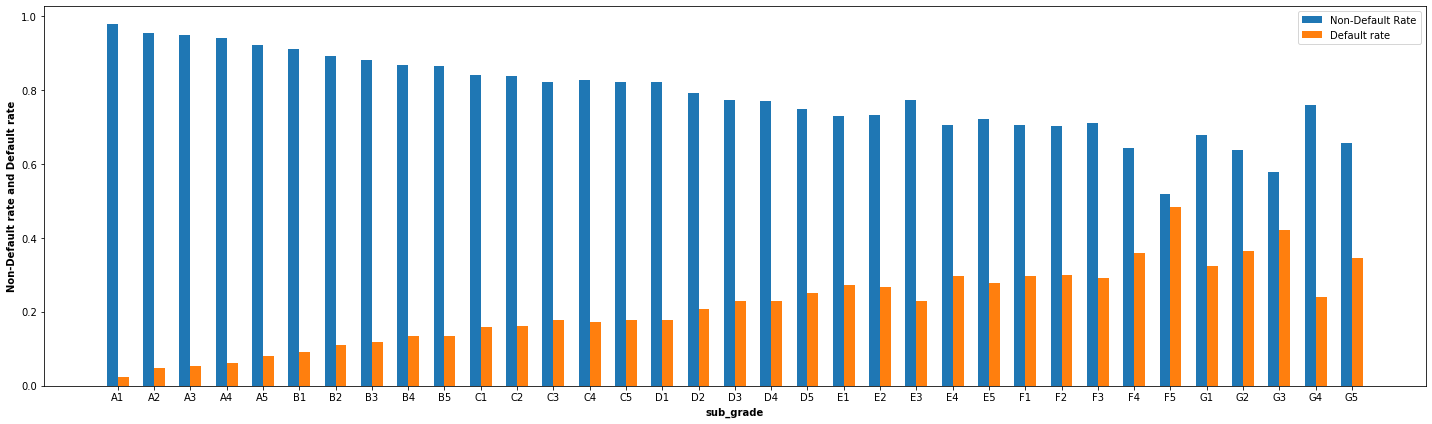

In [1081]:
# Plotting the non-default and default rate
data = [
        [sub_grade_A1_default_rate[0], 
         sub_grade_A2_default_rate[0], 
         sub_grade_A3_default_rate[0], 
         sub_grade_A4_default_rate[0], 
         sub_grade_A5_default_rate[0], 
         sub_grade_B1_default_rate[0], 
         sub_grade_B2_default_rate[0],
         sub_grade_B3_default_rate[0], 
         sub_grade_B4_default_rate[0], 
         sub_grade_B5_default_rate[0], 
         sub_grade_C1_default_rate[0], 
         sub_grade_C2_default_rate[0], 
         sub_grade_C3_default_rate[0], 
         sub_grade_C4_default_rate[0],
         sub_grade_C5_default_rate[0], 
         sub_grade_D1_default_rate[0], 
         sub_grade_D2_default_rate[0], 
         sub_grade_D3_default_rate[0], 
         sub_grade_D4_default_rate[0], 
         sub_grade_D5_default_rate[0], 
         sub_grade_E1_default_rate[0],
         sub_grade_E2_default_rate[0], 
         sub_grade_E3_default_rate[0], 
         sub_grade_E4_default_rate[0], 
         sub_grade_E5_default_rate[0], 
         sub_grade_F1_default_rate[0], 
         sub_grade_F2_default_rate[0], 
         sub_grade_F3_default_rate[0],
         sub_grade_F4_default_rate[0], 
         sub_grade_F5_default_rate[0], 
         sub_grade_G1_default_rate[0], 
         sub_grade_G2_default_rate[0], 
         sub_grade_G3_default_rate[0], 
         sub_grade_G4_default_rate[0], 
         sub_grade_G5_default_rate[0]],     
         
        [sub_grade_A1_default_rate[1], 
         sub_grade_A2_default_rate[1], 
         sub_grade_A3_default_rate[1], 
         sub_grade_A4_default_rate[1], 
         sub_grade_A5_default_rate[1], 
         sub_grade_B1_default_rate[1], 
         sub_grade_B2_default_rate[1],
         sub_grade_B3_default_rate[1], 
         sub_grade_B4_default_rate[1], 
         sub_grade_B5_default_rate[1], 
         sub_grade_C1_default_rate[1], 
         sub_grade_C2_default_rate[1], 
         sub_grade_C3_default_rate[1], 
         sub_grade_C4_default_rate[1],
         sub_grade_C5_default_rate[1], 
         sub_grade_D1_default_rate[1], 
         sub_grade_D2_default_rate[1], 
         sub_grade_D3_default_rate[1], 
         sub_grade_D4_default_rate[1], 
         sub_grade_D5_default_rate[1], 
         sub_grade_E1_default_rate[1],
         sub_grade_E2_default_rate[1], 
         sub_grade_E3_default_rate[1], 
         sub_grade_E4_default_rate[1], 
         sub_grade_E5_default_rate[1], 
         sub_grade_F1_default_rate[1], 
         sub_grade_F2_default_rate[1], 
         sub_grade_F3_default_rate[1],
         sub_grade_F4_default_rate[1], 
         sub_grade_F5_default_rate[1], 
         sub_grade_G1_default_rate[1], 
         sub_grade_G2_default_rate[1], 
         sub_grade_G3_default_rate[1], 
         sub_grade_G4_default_rate[1], 
         sub_grade_G5_default_rate[1]], 
       ]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('sub_grade', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.15 for y in range(len(data[1]))], 
           ['A1', 'A2', 'A3', 'A4', 'A5', 
            'B1', 'B2', 'B3', 'B4', 'B5',
            'C1', 'C2', 'C3', 'C4', 'C5',
            'D1', 'D2', 'D3', 'D4', 'D5',
            'E1', 'E2', 'E3', 'E4', 'E5',
            'F1', 'F2', 'F3', 'F4', 'F5',
            'G1', 'G2', 'G3', 'G4', 'G5',
            ])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.3, label='Non-Default Rate')
Default = plt.bar(x + 0.3, data[1], width = 0.3, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
########## home_ownership #######
################################

In [1082]:
# Showing the unique values of the variable
lending_1.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

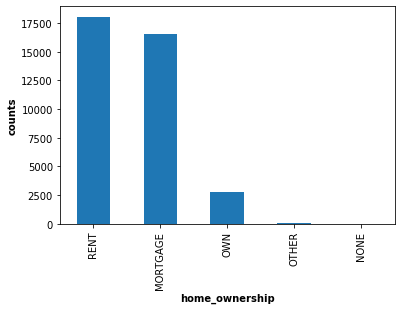

In [1083]:
# Plotting bar chart of counts of the unique values in the variable
pd.value_counts(lending_1['home_ownership']).plot.bar()
plt.xlabel('home_ownership', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()

In [1084]:
# Computing the default and non-default rate
home_ownership_rent = lending_1[lending_1['home_ownership']=='RENT']
home_ownership_mortgage = lending_1[lending_1['home_ownership']=='OWN']
home_ownership_own = lending_1[lending_1['home_ownership']=='MORTGAGE']
home_ownership_other = lending_1[lending_1['home_ownership']=='OTHER']

home_ownership_rent_counts = home_ownership_rent['loan_status'].value_counts()
home_ownership_rent_counts_sum = home_ownership_rent_counts.sum()
home_ownership_rent_default_rate = home_ownership_rent_counts / home_ownership_rent_counts_sum

home_ownership_mortgage_counts = home_ownership_mortgage['loan_status'].value_counts()
home_ownership_mortgage_counts_sum = home_ownership_mortgage_counts.sum()
home_ownership_mortgage_default_rate = home_ownership_mortgage_counts / home_ownership_mortgage_counts_sum

home_ownership_own_counts = home_ownership_own['loan_status'].value_counts()
home_ownership_own_counts_sum = home_ownership_own_counts.sum()
home_ownership_own_default_rate = home_ownership_own_counts / home_ownership_own_counts_sum

home_ownership_other_counts = home_ownership_other['loan_status'].value_counts()
home_ownership_other_counts_sum = home_ownership_other_counts.sum()
home_ownership_other_default_rate = home_ownership_other_counts / home_ownership_other_counts_sum


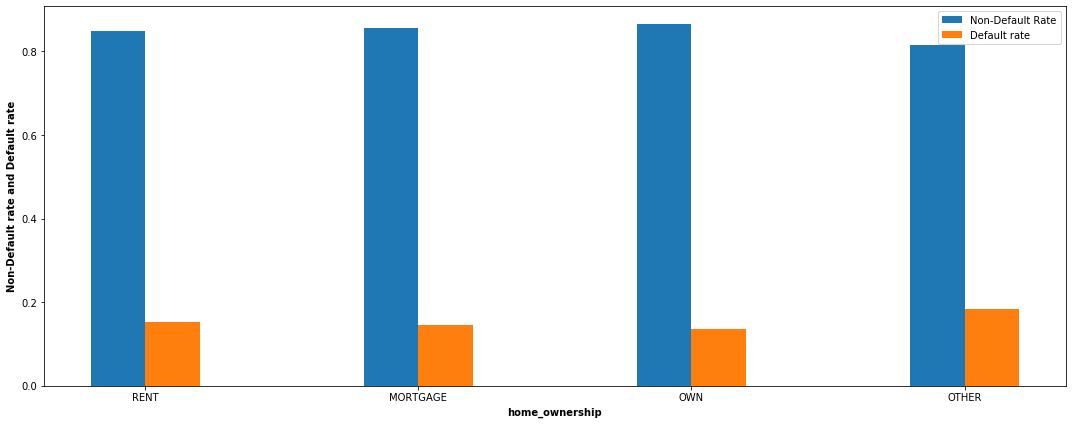

In [1085]:
# Plotting the non-default and default rate
data = [[home_ownership_rent_default_rate[0], 
         home_ownership_mortgage_default_rate[0], 
         home_ownership_own_default_rate[0], 
         home_ownership_other_default_rate[0]],

        [home_ownership_rent_default_rate[1], 
         home_ownership_mortgage_default_rate[1], 
         home_ownership_own_default_rate[1], 
         home_ownership_other_default_rate[1]]]

fig = plt.subplots(figsize =(15, 6)) 

plt.xlabel('home_ownership', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['RENT', 'MORTGAGE', 'OWN','OTHER'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

In [1086]:
# Computing the default and non-default rate for term-36-months
home_ownership_rent_term36 = home_ownership_rent[home_ownership_rent['term']==36]
home_ownership_mortgage_term36 = home_ownership_mortgage[home_ownership_mortgage['term']==36]
home_ownership_own_term36 = home_ownership_own[home_ownership_own['term']==36]
home_ownership_other_term36 = home_ownership_other[home_ownership_other['term']==36]

home_ownership_rent_term36_counts = home_ownership_rent_term36['loan_status'].value_counts()
home_ownership_rent_term36_counts_sum = home_ownership_rent_term36_counts.sum()
home_ownership_rent_term36_default_rate = home_ownership_rent_term36_counts / home_ownership_rent_term36_counts_sum

home_ownership_mortgage_term36_counts = home_ownership_mortgage_term36['loan_status'].value_counts()
home_ownership_mortgage_term36_counts_sum = home_ownership_mortgage_term36_counts.sum()
home_ownership_mortgage_term36_default_rate = home_ownership_mortgage_term36_counts / home_ownership_mortgage_term36_counts_sum

home_ownership_own_term36_counts = home_ownership_own_term36['loan_status'].value_counts()
home_ownership_own_term36_counts_sum = home_ownership_own_term36_counts.sum()
home_ownership_own_term36_default_rate = home_ownership_own_term36_counts / home_ownership_own_term36_counts_sum

home_ownership_other_term36_counts = home_ownership_other_term36['loan_status'].value_counts()
home_ownership_other_term36_counts_sum = home_ownership_other_term36_counts.sum()
home_ownership_other_term36_default_rate = home_ownership_other_term36_counts / home_ownership_other_term36_counts_sum

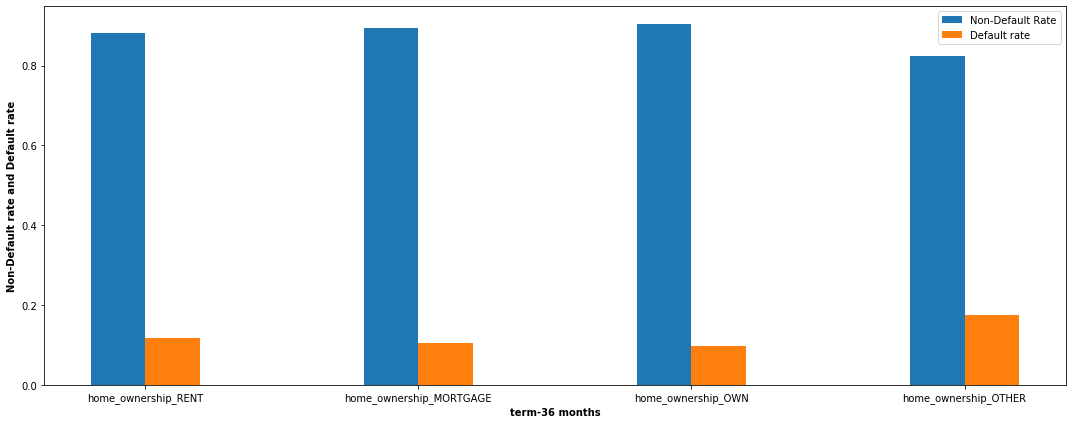

In [1087]:
# Plotting the non-default and default rate for term-36-months
data = [[home_ownership_rent_term36_default_rate[0], 
         home_ownership_mortgage_term36_default_rate[0], 
         home_ownership_own_term36_default_rate[0], 
         home_ownership_other_term36_default_rate[0]],

        [home_ownership_rent_term36_default_rate[1], 
         home_ownership_mortgage_term36_default_rate[1], 
         home_ownership_own_term36_default_rate[1], 
         home_ownership_other_term36_default_rate[1]]]

fig = plt.subplots(figsize =(15, 6)) 

plt.xlabel('term-36 months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['home_ownership_RENT', 'home_ownership_MORTGAGE', 'home_ownership_OWN','home_ownership_OTHER'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

In [1088]:
# Computing the default and non-default rate for term-60-months
home_ownership_rent_term60 = home_ownership_rent[home_ownership_rent['term']==60]
home_ownership_mortgage_term60 = home_ownership_mortgage[home_ownership_mortgage['term']==60]
home_ownership_own_term60 = home_ownership_own[home_ownership_own['term']==60]
home_ownership_other_term60 = home_ownership_other[home_ownership_other['term']==60]

home_ownership_rent_term60_counts = home_ownership_rent_term60['loan_status'].value_counts()
home_ownership_rent_term60_counts_sum = home_ownership_rent_term60_counts.sum()
home_ownership_rent_term60_default_rate = home_ownership_rent_term60_counts / home_ownership_rent_term60_counts_sum

home_ownership_mortgage_term60_counts = home_ownership_mortgage_term60['loan_status'].value_counts()
home_ownership_mortgage_term60_counts_sum = home_ownership_mortgage_term60_counts.sum()
home_ownership_mortgage_term60_default_rate = home_ownership_mortgage_term60_counts / home_ownership_mortgage_term60_counts_sum

home_ownership_own_term60_counts = home_ownership_own_term60['loan_status'].value_counts()
home_ownership_own_term60_counts_sum = home_ownership_own_term60_counts.sum()
home_ownership_own_term60_default_rate = home_ownership_own_term60_counts / home_ownership_own_term60_counts_sum

home_ownership_other_term60_counts = home_ownership_other_term60['loan_status'].value_counts()
home_ownership_other_term60_counts_sum = home_ownership_other_term60_counts.sum()
home_ownership_other_term60_default_rate = home_ownership_other_term60_counts / home_ownership_other_term60_counts_sum
home_ownership_other_term60_default_rate[0] = 0


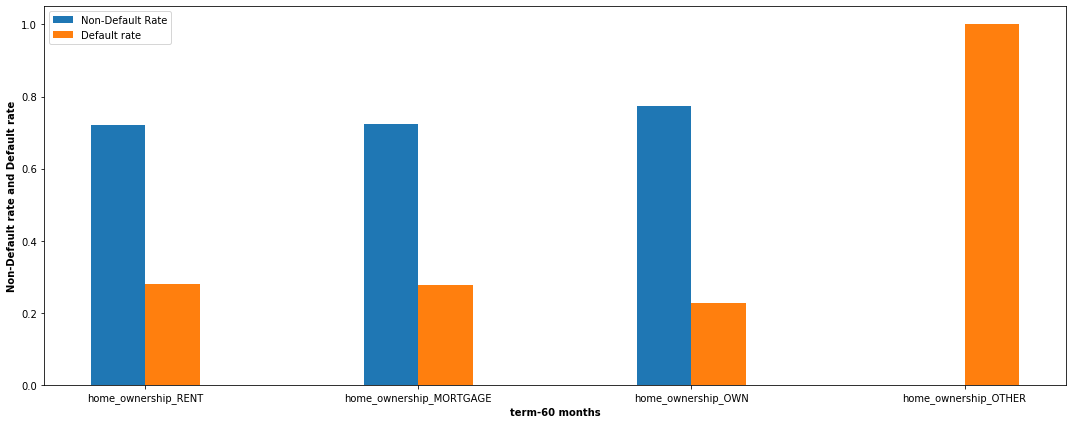

In [1089]:
# Plotting the non-default and default rate for term-60-months
data = [[home_ownership_rent_term60_default_rate[0], 
         home_ownership_mortgage_term60_default_rate[0], 
         home_ownership_own_term60_default_rate[0], 
         home_ownership_other_term60_default_rate[0]],

        [home_ownership_rent_term60_default_rate[1], 
         home_ownership_mortgage_term60_default_rate[1], 
         home_ownership_own_term60_default_rate[1],1]]

fig = plt.subplots(figsize =(15, 6)) 

plt.xlabel('term-60 months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['home_ownership_RENT', 'home_ownership_MORTGAGE', 'home_ownership_OWN','home_ownership_OTHER'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
######## verification_status ########
################################

In [1090]:
# Showing the unique values of the variable
lending_1.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

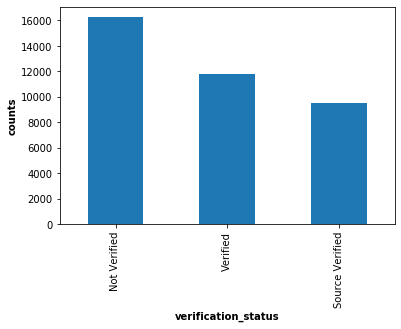

In [1091]:
# Plotting bar chart of counts of the unique values in the variable
pd.value_counts(lending_1['verification_status']).plot.bar()
plt.xlabel('verification_status', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()

In [1092]:
# Computing the default and non-default rate
verification_status_source_verified = lending_1[lending_1['verification_status']=='Source Verified']
verification_status_not_verified = lending_1[lending_1['verification_status']=='Not Verified']
verification_status_verified = lending_1[lending_1['verification_status']=='Verified']

verification_status_source_verified_counts = verification_status_source_verified['loan_status'].value_counts()
verification_status_source_verified_counts_sum = verification_status_source_verified_counts.sum()
verification_status_source_verified_default_rate = verification_status_source_verified_counts / verification_status_source_verified_counts_sum

verification_status_not_verified_counts = verification_status_not_verified['loan_status'].value_counts()
verification_status_not_verified_counts_sum = verification_status_not_verified_counts.sum()
verification_status_not_verified_default_rate = verification_status_not_verified_counts / verification_status_not_verified_counts_sum

verification_status_verified_counts = verification_status_verified['loan_status'].value_counts()
verification_status_verified_counts_sum = verification_status_verified_counts.sum()
verification_status_verified_default_rate = verification_status_verified_counts / verification_status_verified_counts_sum


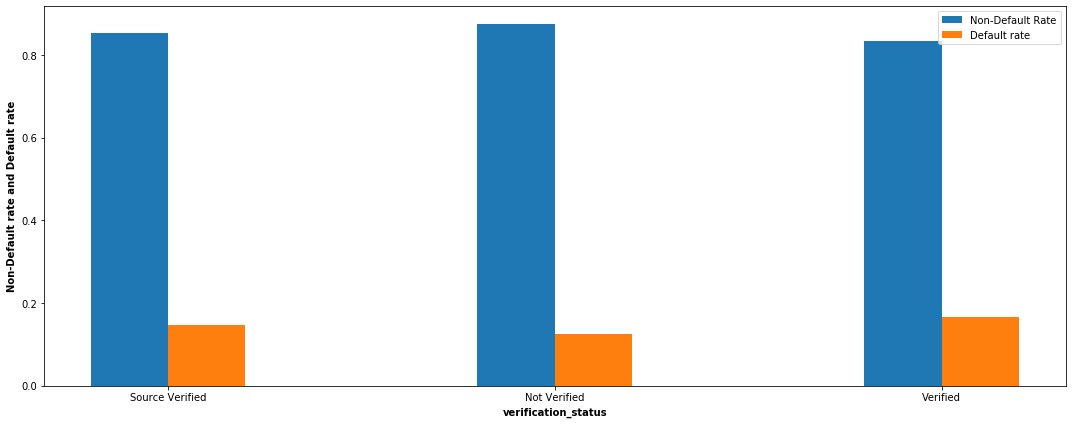

In [1093]:
# Plotting the non-default and default rate
data = [[verification_status_source_verified_default_rate[0], 
         verification_status_not_verified_default_rate[0], 
         verification_status_verified_default_rate[0]],

        [verification_status_source_verified_default_rate[1], 
         verification_status_not_verified_default_rate[1], 
         verification_status_verified_default_rate[1]]]

fig = plt.subplots(figsize =(15, 6)) 

plt.xlabel('verification_status', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['Source Verified', 'Not Verified', 'Verified'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()

################################
#### Derived Variable ###
### annual_inc / loan_amount ###
################################

In [1094]:
# Derived variable
lending_1['annual_inc_divided_by_loan_amount'] = lending_1['annual_inc'] / lending_1['loan_amnt']

In [1095]:
lending_1.annual_inc_divided_by_loan_amount.describe()

count   37544.00
mean        9.01
std        14.00
min         1.20
25%         4.00
50%         6.16
75%        10.21
max      1266.67
Name: annual_inc_divided_by_loan_amount, dtype: float64

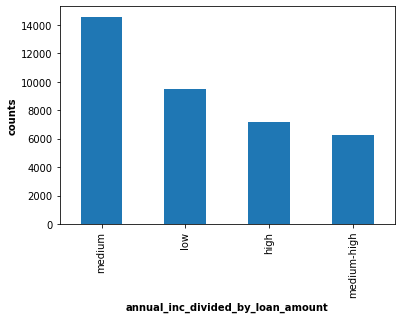

In [1096]:
# Plotting the counts of the range
lending_1['annual_inc_divided_by_loan_amount_1'] = np.nan
lending_1['annual_inc_divided_by_loan_amount_1'] = np.where((lending_1['annual_inc_divided_by_loan_amount'] >= 0) & (lending_1['annual_inc_divided_by_loan_amount'] <= 4),'low',lending_1['annual_inc_divided_by_loan_amount_1'])
lending_1['annual_inc_divided_by_loan_amount_1'] = np.where((lending_1['annual_inc_divided_by_loan_amount'] > 4) & (lending_1['annual_inc_divided_by_loan_amount'] <= 8),'medium',lending_1['annual_inc_divided_by_loan_amount_1'])
lending_1['annual_inc_divided_by_loan_amount_1'] = np.where((lending_1['annual_inc_divided_by_loan_amount'] > 8) & (lending_1['annual_inc_divided_by_loan_amount'] <= 12),'medium-high',lending_1['annual_inc_divided_by_loan_amount_1'])
lending_1['annual_inc_divided_by_loan_amount_1'] = np.where((lending_1['annual_inc_divided_by_loan_amount'] > 12),'high',lending_1['annual_inc_divided_by_loan_amount_1'])

pd.value_counts(lending_1['annual_inc_divided_by_loan_amount_1'])
pd.value_counts(lending_1['annual_inc_divided_by_loan_amount_1']).plot.bar()
plt.xlabel('annual_inc_divided_by_loan_amount', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()


In [1097]:
# Computing the default and non-default rate
annual_inc_divided_by_loan_amount_low = lending_1[lending_1['annual_inc_divided_by_loan_amount_1']=='low']
annual_inc_divided_by_loan_amount_med = lending_1[lending_1['annual_inc_divided_by_loan_amount_1']=='medium']
annual_inc_divided_by_loan_amount_med_high = lending_1[lending_1['annual_inc_divided_by_loan_amount_1']=='medium-high']
annual_inc_divided_by_loan_amount_high = lending_1[lending_1['annual_inc_divided_by_loan_amount_1']=='high']

annual_inc_divided_by_loan_amount_low_counts = annual_inc_divided_by_loan_amount_low['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_low_counts_sum = annual_inc_divided_by_loan_amount_low_counts.sum()
annual_inc_divided_by_loan_amount_low_default_rate = annual_inc_divided_by_loan_amount_low_counts / annual_inc_divided_by_loan_amount_low_counts_sum

annual_inc_divided_by_loan_amount_med_counts = annual_inc_divided_by_loan_amount_med['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_med_counts_sum = annual_inc_divided_by_loan_amount_med_counts.sum()
annual_inc_divided_by_loan_amount_med_default_rate = annual_inc_divided_by_loan_amount_med_counts / annual_inc_divided_by_loan_amount_med_counts_sum

annual_inc_divided_by_loan_amount_med_high_counts = annual_inc_divided_by_loan_amount_med_high['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_med_high_counts_sum = annual_inc_divided_by_loan_amount_med_high_counts.sum()
annual_inc_divided_by_loan_amount_med_high_default_rate = annual_inc_divided_by_loan_amount_med_high_counts / annual_inc_divided_by_loan_amount_med_high_counts_sum

annual_inc_divided_by_loan_amount_high_counts = annual_inc_divided_by_loan_amount_high['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_high_counts_sum = annual_inc_divided_by_loan_amount_high_counts.sum()
annual_inc_divided_by_loan_amount_high_default_rate = annual_inc_divided_by_loan_amount_high_counts / annual_inc_divided_by_loan_amount_high_counts_sum


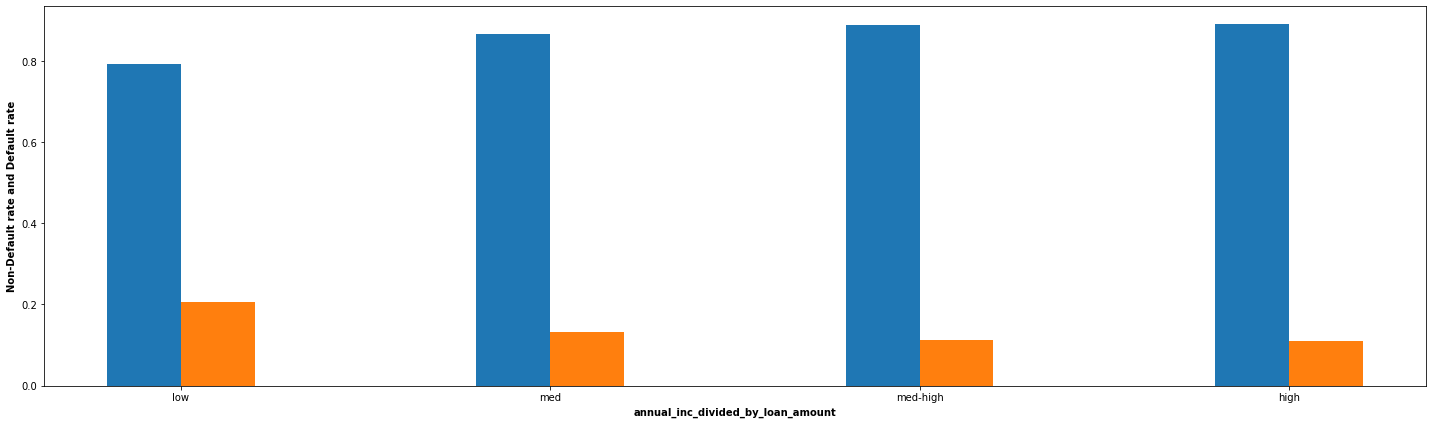

In [1098]:
# Plotting the non-default and default rate
data = [[annual_inc_divided_by_loan_amount_low_default_rate[0], annual_inc_divided_by_loan_amount_med_default_rate[0], annual_inc_divided_by_loan_amount_med_high_default_rate[0], annual_inc_divided_by_loan_amount_high_default_rate[0]],
[annual_inc_divided_by_loan_amount_low_default_rate[1], annual_inc_divided_by_loan_amount_med_default_rate[1], annual_inc_divided_by_loan_amount_med_high_default_rate[1], annual_inc_divided_by_loan_amount_high_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('annual_inc_divided_by_loan_amount', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()


In [1099]:
# Computing the default and non-default rate for term-36-months
annual_inc_divided_by_loan_amount_low_term36 = annual_inc_divided_by_loan_amount_low[annual_inc_divided_by_loan_amount_low['term']==36]
annual_inc_divided_by_loan_amount_med_term36 = annual_inc_divided_by_loan_amount_med[annual_inc_divided_by_loan_amount_med['term']==36]
annual_inc_divided_by_loan_amount_med_high_term36 = annual_inc_divided_by_loan_amount_med_high[annual_inc_divided_by_loan_amount_med_high['term']==36]
annual_inc_divided_by_loan_amount_high_term36 = annual_inc_divided_by_loan_amount_high[annual_inc_divided_by_loan_amount_high['term']==36]

annual_inc_divided_by_loan_amount_low_term36_counts = annual_inc_divided_by_loan_amount_low_term36['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_low_term36_counts_sum = annual_inc_divided_by_loan_amount_low_term36_counts.sum()
annual_inc_divided_by_loan_amount_low_term36_default_rate = annual_inc_divided_by_loan_amount_low_term36_counts / annual_inc_divided_by_loan_amount_low_term36_counts_sum

annual_inc_divided_by_loan_amount_med_term36_counts = annual_inc_divided_by_loan_amount_med_term36['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_med_term36_counts_sum = annual_inc_divided_by_loan_amount_med_term36_counts.sum()
annual_inc_divided_by_loan_amount_med_term36_default_rate = annual_inc_divided_by_loan_amount_med_term36_counts / annual_inc_divided_by_loan_amount_med_term36_counts_sum

annual_inc_divided_by_loan_amount_med_high_term36_counts = annual_inc_divided_by_loan_amount_med_high_term36['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_med_high_term36_counts_sum = annual_inc_divided_by_loan_amount_med_high_term36_counts.sum()
annual_inc_divided_by_loan_amount_med_high_term36_default_rate = annual_inc_divided_by_loan_amount_med_high_term36_counts / annual_inc_divided_by_loan_amount_med_high_term36_counts_sum

annual_inc_divided_by_loan_amount_high_term36_counts = annual_inc_divided_by_loan_amount_high_term36['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_high_term36_counts_sum = annual_inc_divided_by_loan_amount_high_term36_counts.sum()
annual_inc_divided_by_loan_amount_high_term36_default_rate = annual_inc_divided_by_loan_amount_high_term36_counts / annual_inc_divided_by_loan_amount_high_term36_counts_sum


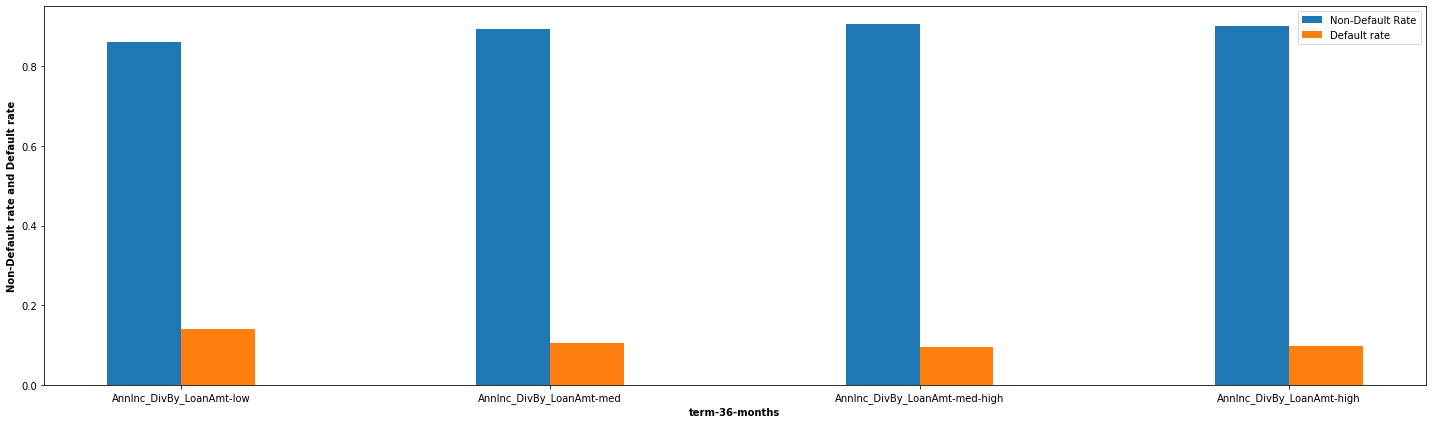

In [1100]:
# Plotting the non-default and default rate for term-36-months
data = [[annual_inc_divided_by_loan_amount_low_term36_default_rate[0], annual_inc_divided_by_loan_amount_med_term36_default_rate[0], annual_inc_divided_by_loan_amount_med_high_term36_default_rate[0], annual_inc_divided_by_loan_amount_high_term36_default_rate[0]],
[annual_inc_divided_by_loan_amount_low_term36_default_rate[1], annual_inc_divided_by_loan_amount_med_term36_default_rate[1], annual_inc_divided_by_loan_amount_med_high_term36_default_rate[1], annual_inc_divided_by_loan_amount_high_term36_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-36-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['AnnInc_DivBy_LoanAmt-low', 'AnnInc_DivBy_LoanAmt-med', 'AnnInc_DivBy_LoanAmt-med-high', 'AnnInc_DivBy_LoanAmt-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1101]:
# Computing the default and non-default rate for term-60-months
annual_inc_divided_by_loan_amount_low_term60 = annual_inc_divided_by_loan_amount_low[annual_inc_divided_by_loan_amount_low['term']==60]
annual_inc_divided_by_loan_amount_med_term60 = annual_inc_divided_by_loan_amount_med[annual_inc_divided_by_loan_amount_med['term']==60]
annual_inc_divided_by_loan_amount_med_high_term60 = annual_inc_divided_by_loan_amount_med_high[annual_inc_divided_by_loan_amount_med_high['term']==60]
annual_inc_divided_by_loan_amount_high_term60 = annual_inc_divided_by_loan_amount_high[annual_inc_divided_by_loan_amount_high['term']==60]

annual_inc_divided_by_loan_amount_low_term60_counts = annual_inc_divided_by_loan_amount_low_term60['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_low_term60_counts_sum = annual_inc_divided_by_loan_amount_low_term60_counts.sum()
annual_inc_divided_by_loan_amount_low_term60_default_rate = annual_inc_divided_by_loan_amount_low_term60_counts / annual_inc_divided_by_loan_amount_low_term60_counts_sum

annual_inc_divided_by_loan_amount_med_term60_counts = annual_inc_divided_by_loan_amount_med_term60['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_med_term60_counts_sum = annual_inc_divided_by_loan_amount_med_term60_counts.sum()
annual_inc_divided_by_loan_amount_med_term60_default_rate = annual_inc_divided_by_loan_amount_med_term60_counts / annual_inc_divided_by_loan_amount_med_term60_counts_sum

annual_inc_divided_by_loan_amount_med_high_term60_counts = annual_inc_divided_by_loan_amount_med_high_term60['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_med_high_term60_counts_sum = annual_inc_divided_by_loan_amount_med_high_term60_counts.sum()
annual_inc_divided_by_loan_amount_med_high_term60_default_rate = annual_inc_divided_by_loan_amount_med_high_term60_counts / annual_inc_divided_by_loan_amount_med_high_term60_counts_sum

annual_inc_divided_by_loan_amount_high_term60_counts = annual_inc_divided_by_loan_amount_high_term60['loan_status'].value_counts()
annual_inc_divided_by_loan_amount_high_term60_counts_sum = annual_inc_divided_by_loan_amount_high_term60_counts.sum()
annual_inc_divided_by_loan_amount_high_term60_default_rate = annual_inc_divided_by_loan_amount_high_term60_counts / annual_inc_divided_by_loan_amount_high_term60_counts_sum


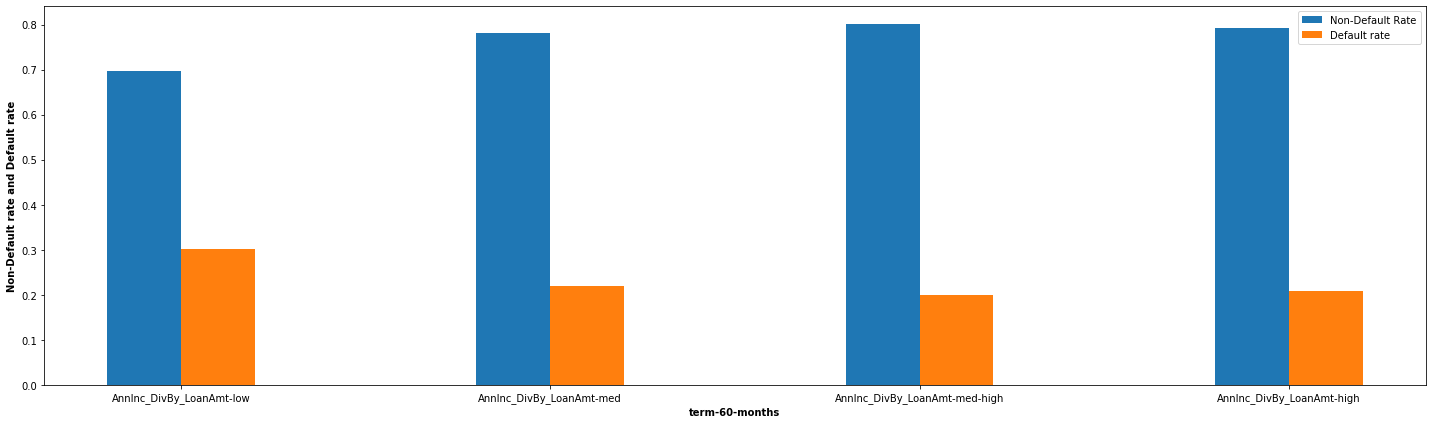

In [1102]:
# Plotting the non-default and default rate for term-60-months
data = [[annual_inc_divided_by_loan_amount_low_term60_default_rate[0], annual_inc_divided_by_loan_amount_med_term60_default_rate[0], annual_inc_divided_by_loan_amount_med_high_term60_default_rate[0], annual_inc_divided_by_loan_amount_high_term60_default_rate[0]],
[annual_inc_divided_by_loan_amount_low_term60_default_rate[1], annual_inc_divided_by_loan_amount_med_term60_default_rate[1], annual_inc_divided_by_loan_amount_med_high_term60_default_rate[1], annual_inc_divided_by_loan_amount_high_term60_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-60-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
          ['AnnInc_DivBy_LoanAmt-low', 'AnnInc_DivBy_LoanAmt-med', 'AnnInc_DivBy_LoanAmt-med-high', 'AnnInc_DivBy_LoanAmt-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
#### Derived Variable ###
### loan_amount / int_rate ###
################################

In [1103]:
# Derived variable
lending_1['loan_amount_divided_by_interest_rate'] = lending_1['loan_amnt'] / lending_1['int_rate']

In [1104]:
# Showing the statistical values of the variable
lending_1.loan_amount_divided_by_interest_rate.describe()

count   37544.00
mean      971.52
std       632.48
min        43.82
25%       499.36
50%       840.93
75%      1320.42
max      5008.35
Name: loan_amount_divided_by_interest_rate, dtype: float64

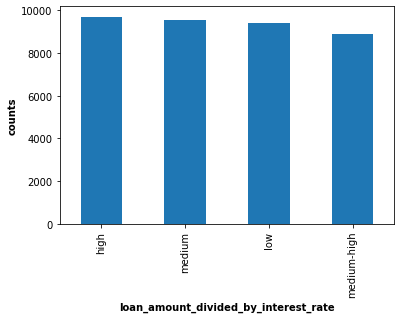

In [1105]:
# Plotting the counts of the range
lending_1['loan_amount_divided_by_interest_rate_1'] = np.nan
lending_1['loan_amount_divided_by_interest_rate_1'] = np.where((lending_1['loan_amount_divided_by_interest_rate'] >= 0) & (lending_1['loan_amount_divided_by_interest_rate'] <= 500),'low',lending_1['loan_amount_divided_by_interest_rate_1'])
lending_1['loan_amount_divided_by_interest_rate_1'] = np.where((lending_1['loan_amount_divided_by_interest_rate'] > 500) & (lending_1['loan_amount_divided_by_interest_rate'] <= 850),'medium',lending_1['loan_amount_divided_by_interest_rate_1'])
lending_1['loan_amount_divided_by_interest_rate_1'] = np.where((lending_1['loan_amount_divided_by_interest_rate'] > 850) & (lending_1['loan_amount_divided_by_interest_rate'] <= 1300),'medium-high',lending_1['loan_amount_divided_by_interest_rate_1'])
lending_1['loan_amount_divided_by_interest_rate_1'] = np.where((lending_1['loan_amount_divided_by_interest_rate'] > 1300),'high',lending_1['loan_amount_divided_by_interest_rate_1'])
pd.value_counts(lending_1['loan_amount_divided_by_interest_rate_1'])
pd.value_counts(lending_1['loan_amount_divided_by_interest_rate_1']).plot.bar()
plt.xlabel('loan_amount_divided_by_interest_rate', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()


In [1106]:
# Computing the default and non-default rate
loan_amount_divided_by_interest_rate_low = lending_1[lending_1['loan_amount_divided_by_interest_rate_1']=='low']
loan_amount_divided_by_interest_rate_med = lending_1[lending_1['loan_amount_divided_by_interest_rate_1']=='medium']
loan_amount_divided_by_interest_rate_med_high = lending_1[lending_1['loan_amount_divided_by_interest_rate_1']=='medium-high']
loan_amount_divided_by_interest_rate_high = lending_1[lending_1['loan_amount_divided_by_interest_rate_1']=='high']

loan_amount_divided_by_interest_rate_low_counts = loan_amount_divided_by_interest_rate_low['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_low_counts_sum = loan_amount_divided_by_interest_rate_low_counts.sum()
loan_amount_divided_by_interest_rate_low_default_rate = loan_amount_divided_by_interest_rate_low_counts / loan_amount_divided_by_interest_rate_low_counts_sum

loan_amount_divided_by_interest_rate_med_counts = loan_amount_divided_by_interest_rate_med['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_med_counts_sum = loan_amount_divided_by_interest_rate_med_counts.sum()
loan_amount_divided_by_interest_rate_med_default_rate = loan_amount_divided_by_interest_rate_med_counts / loan_amount_divided_by_interest_rate_med_counts_sum

loan_amount_divided_by_interest_rate_med_high_counts = loan_amount_divided_by_interest_rate_med_high['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_med_high_counts_sum = loan_amount_divided_by_interest_rate_med_high_counts.sum()
loan_amount_divided_by_interest_rate_med_high_default_rate = loan_amount_divided_by_interest_rate_med_high_counts / loan_amount_divided_by_interest_rate_med_high_counts_sum

loan_amount_divided_by_interest_rate_high_counts = loan_amount_divided_by_interest_rate_high['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_high_counts_sum = loan_amount_divided_by_interest_rate_high_counts.sum()
loan_amount_divided_by_interest_rate_high_default_rate = loan_amount_divided_by_interest_rate_high_counts / loan_amount_divided_by_interest_rate_high_counts_sum


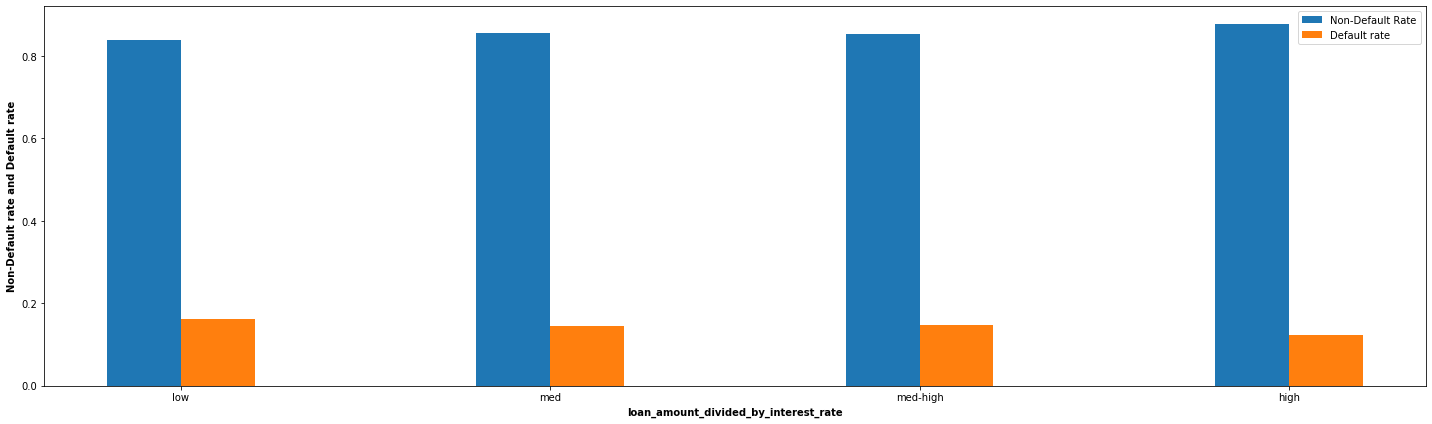

In [1107]:
# Plotting the non-default and default rate
data = [[loan_amount_divided_by_interest_rate_low_default_rate[0], loan_amount_divided_by_interest_rate_med_default_rate[0], loan_amount_divided_by_interest_rate_med_high_default_rate[0], loan_amount_divided_by_interest_rate_high_default_rate[0]],
[loan_amount_divided_by_interest_rate_low_default_rate[1], loan_amount_divided_by_interest_rate_med_default_rate[1], loan_amount_divided_by_interest_rate_med_high_default_rate[1], loan_amount_divided_by_interest_rate_high_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('loan_amount_divided_by_interest_rate', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.legend()
plt.tight_layout()


In [1108]:
# Computing the default and non-default rate for term-36-months
loan_amount_divided_by_interest_rate_low_term36 = loan_amount_divided_by_interest_rate_low[loan_amount_divided_by_interest_rate_low['term']==36]
loan_amount_divided_by_interest_rate_med_term36 = loan_amount_divided_by_interest_rate_med[loan_amount_divided_by_interest_rate_med['term']==36]
loan_amount_divided_by_interest_rate_med_high_term36 = loan_amount_divided_by_interest_rate_med_high[loan_amount_divided_by_interest_rate_med_high['term']==36]
loan_amount_divided_by_interest_rate_high_term36 = loan_amount_divided_by_interest_rate_high[loan_amount_divided_by_interest_rate_high['term']==36]

loan_amount_divided_by_interest_rate_low_term36_counts = loan_amount_divided_by_interest_rate_low_term36['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_low_term36_counts_sum = loan_amount_divided_by_interest_rate_low_term36_counts.sum()
loan_amount_divided_by_interest_rate_low_term36_default_rate = loan_amount_divided_by_interest_rate_low_term36_counts / loan_amount_divided_by_interest_rate_low_term36_counts_sum

loan_amount_divided_by_interest_rate_med_term36_counts = loan_amount_divided_by_interest_rate_med_term36['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_med_term36_counts_sum = loan_amount_divided_by_interest_rate_med_term36_counts.sum()
loan_amount_divided_by_interest_rate_med_term36_default_rate = loan_amount_divided_by_interest_rate_med_term36_counts / loan_amount_divided_by_interest_rate_med_term36_counts_sum

loan_amount_divided_by_interest_rate_med_high_term36_counts = loan_amount_divided_by_interest_rate_med_high_term36['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_med_high_term36_counts_sum = loan_amount_divided_by_interest_rate_med_high_term36_counts.sum()
loan_amount_divided_by_interest_rate_med_high_term36_default_rate = loan_amount_divided_by_interest_rate_med_high_term36_counts / loan_amount_divided_by_interest_rate_med_high_term36_counts_sum

loan_amount_divided_by_interest_rate_high_term36_counts = loan_amount_divided_by_interest_rate_high_term36['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_high_term36_counts_sum = loan_amount_divided_by_interest_rate_high_term36_counts.sum()
loan_amount_divided_by_interest_rate_high_term36_default_rate = loan_amount_divided_by_interest_rate_high_term36_counts / loan_amount_divided_by_interest_rate_high_term36_counts_sum


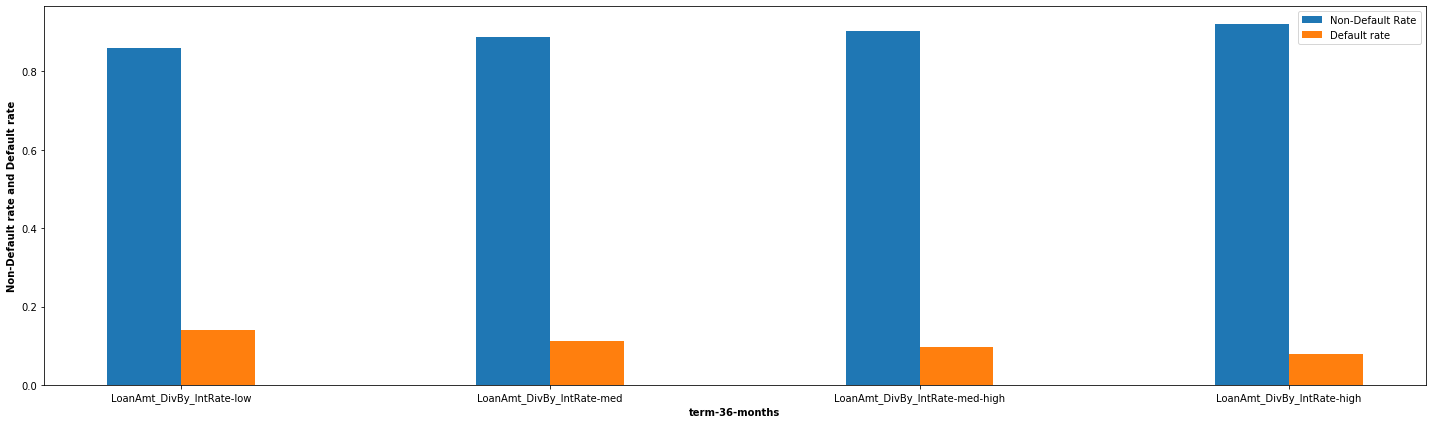

In [1109]:
# Plotting the non-default and default rate for term-36-months
data = [[loan_amount_divided_by_interest_rate_low_term36_default_rate[0], loan_amount_divided_by_interest_rate_med_term36_default_rate[0], loan_amount_divided_by_interest_rate_med_high_term36_default_rate[0], loan_amount_divided_by_interest_rate_high_term36_default_rate[0]],
[loan_amount_divided_by_interest_rate_low_term36_default_rate[1], loan_amount_divided_by_interest_rate_med_term36_default_rate[1], loan_amount_divided_by_interest_rate_med_high_term36_default_rate[1], loan_amount_divided_by_interest_rate_high_term36_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-36-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['LoanAmt_DivBy_IntRate-low', 'LoanAmt_DivBy_IntRate-med', 'LoanAmt_DivBy_IntRate-med-high', 'LoanAmt_DivBy_IntRate-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1110]:
# Computing the default and non-default rate for term-60-months
loan_amount_divided_by_interest_rate_low_term60 = loan_amount_divided_by_interest_rate_low[loan_amount_divided_by_interest_rate_low['term']==60]
loan_amount_divided_by_interest_rate_med_term60 = loan_amount_divided_by_interest_rate_med[loan_amount_divided_by_interest_rate_med['term']==60]
loan_amount_divided_by_interest_rate_med_high_term60 = loan_amount_divided_by_interest_rate_med_high[loan_amount_divided_by_interest_rate_med_high['term']==60]
loan_amount_divided_by_interest_rate_high_term60 = loan_amount_divided_by_interest_rate_high[loan_amount_divided_by_interest_rate_high['term']==60]

loan_amount_divided_by_interest_rate_low_term60_counts = loan_amount_divided_by_interest_rate_low_term60['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_low_term60_counts_sum = loan_amount_divided_by_interest_rate_low_term60_counts.sum()
loan_amount_divided_by_interest_rate_low_term60_default_rate = loan_amount_divided_by_interest_rate_low_term60_counts / loan_amount_divided_by_interest_rate_low_term60_counts_sum

loan_amount_divided_by_interest_rate_med_term60_counts = loan_amount_divided_by_interest_rate_med_term60['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_med_term60_counts_sum = loan_amount_divided_by_interest_rate_med_term60_counts.sum()
loan_amount_divided_by_interest_rate_med_term60_default_rate = loan_amount_divided_by_interest_rate_med_term60_counts / loan_amount_divided_by_interest_rate_med_term60_counts_sum

loan_amount_divided_by_interest_rate_med_high_term60_counts = loan_amount_divided_by_interest_rate_med_high_term60['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_med_high_term60_counts_sum = loan_amount_divided_by_interest_rate_med_high_term60_counts.sum()
loan_amount_divided_by_interest_rate_med_high_term60_default_rate = loan_amount_divided_by_interest_rate_med_high_term60_counts / loan_amount_divided_by_interest_rate_med_high_term60_counts_sum

loan_amount_divided_by_interest_rate_high_term60_counts = loan_amount_divided_by_interest_rate_high_term60['loan_status'].value_counts()
loan_amount_divided_by_interest_rate_high_term60_counts_sum = loan_amount_divided_by_interest_rate_high_term60_counts.sum()
loan_amount_divided_by_interest_rate_high_term60_default_rate = loan_amount_divided_by_interest_rate_high_term60_counts / loan_amount_divided_by_interest_rate_high_term60_counts_sum


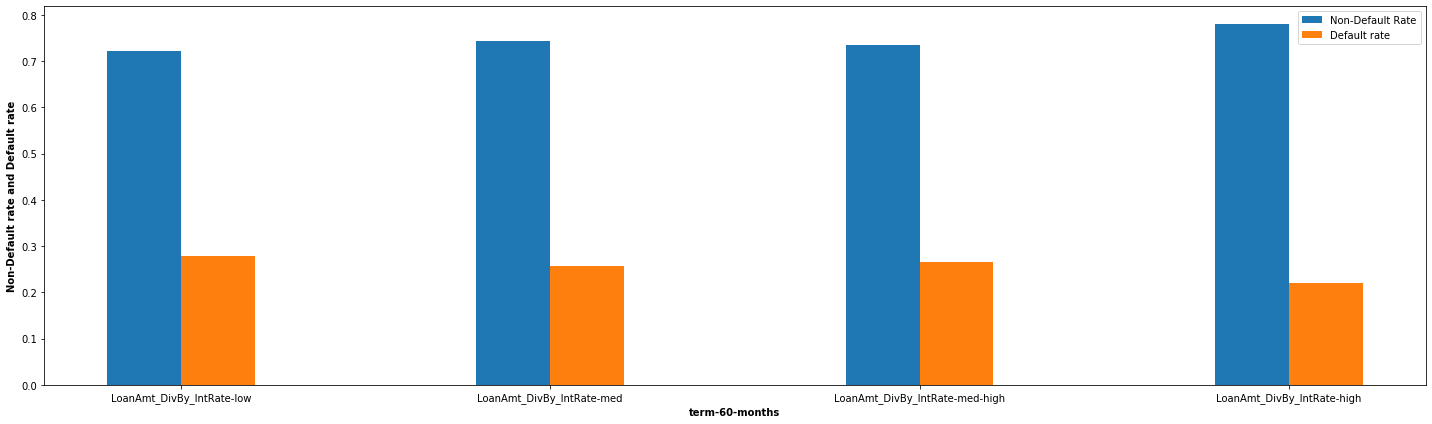

In [1111]:
# Plotting the non-default and default rate for term-60-months
data = [[loan_amount_divided_by_interest_rate_low_term60_default_rate[0], loan_amount_divided_by_interest_rate_med_term60_default_rate[0], loan_amount_divided_by_interest_rate_med_high_term60_default_rate[0], loan_amount_divided_by_interest_rate_high_term60_default_rate[0]],
[loan_amount_divided_by_interest_rate_low_term60_default_rate[1], loan_amount_divided_by_interest_rate_med_term60_default_rate[1], loan_amount_divided_by_interest_rate_med_high_term60_default_rate[1], loan_amount_divided_by_interest_rate_high_term60_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-60-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['LoanAmt_DivBy_IntRate-low', 'LoanAmt_DivBy_IntRate-med', 'LoanAmt_DivBy_IntRate-med-high', 'LoanAmt_DivBy_IntRate-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


################################
#### Derived Variable ###
### annual_income / int_rate ###
################################

In [1112]:
# Derived variable
lending_1['annual_income_divided_by_interest_rate'] = lending_1['annual_inc'] / lending_1['int_rate']

In [1113]:
# Showing the statistical values of the variable
lending_1.annual_income_divided_by_interest_rate.describe()

count    37544.00
mean      6375.65
std       6384.54
min        247.79
25%       3389.83
50%       5089.88
75%       7771.36
max     471327.57
Name: annual_income_divided_by_interest_rate, dtype: float64

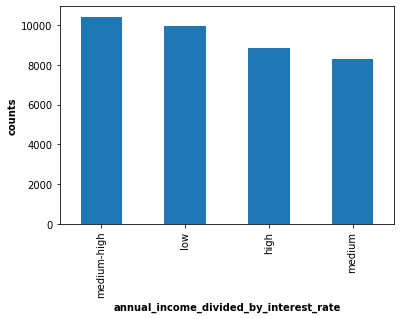

In [1114]:
# Plotting the counts of the range
lending_1['annual_income_divided_by_interest_rate_1'] = np.nan
lending_1['annual_income_divided_by_interest_rate_1'] = np.where((lending_1['annual_income_divided_by_interest_rate'] >= 0) & (lending_1['annual_income_divided_by_interest_rate'] <= 3500),'low',lending_1['annual_income_divided_by_interest_rate_1'])
lending_1['annual_income_divided_by_interest_rate_1'] = np.where((lending_1['annual_income_divided_by_interest_rate'] > 3500) & (lending_1['annual_income_divided_by_interest_rate'] <= 5000),'medium',lending_1['annual_income_divided_by_interest_rate_1'])
lending_1['annual_income_divided_by_interest_rate_1'] = np.where((lending_1['annual_income_divided_by_interest_rate'] > 5000) & (lending_1['annual_income_divided_by_interest_rate'] <= 8000),'medium-high',lending_1['annual_income_divided_by_interest_rate_1'])
lending_1['annual_income_divided_by_interest_rate_1'] = np.where((lending_1['annual_income_divided_by_interest_rate'] > 8000),'high',lending_1['annual_income_divided_by_interest_rate_1'])

pd.value_counts(lending_1['annual_income_divided_by_interest_rate_1']).plot.bar()
plt.xlabel('annual_income_divided_by_interest_rate', fontweight ='bold')
plt.ylabel('counts', fontweight ='bold') 
plt.show()

In [1115]:
# Computing the default and non-default rate
annual_income_divided_by_interest_rate_low = lending_1[lending_1['annual_income_divided_by_interest_rate_1']=='low']
annual_income_divided_by_interest_rate_med = lending_1[lending_1['annual_income_divided_by_interest_rate_1']=='medium']
annual_income_divided_by_interest_rate_med_high = lending_1[lending_1['annual_income_divided_by_interest_rate_1']=='medium-high']
annual_income_divided_by_interest_rate_high = lending_1[lending_1['annual_income_divided_by_interest_rate_1']=='high']

annual_income_divided_by_interest_rate_low_counts = annual_income_divided_by_interest_rate_low['loan_status'].value_counts()
annual_income_divided_by_interest_rate_low_counts_sum = annual_income_divided_by_interest_rate_low_counts.sum()
annual_income_divided_by_interest_rate_low_default_rate = annual_income_divided_by_interest_rate_low_counts / annual_income_divided_by_interest_rate_low_counts_sum

annual_income_divided_by_interest_rate_med_counts = annual_income_divided_by_interest_rate_med['loan_status'].value_counts()
annual_income_divided_by_interest_rate_med_counts_sum = annual_income_divided_by_interest_rate_med_counts.sum()
annual_income_divided_by_interest_rate_med_default_rate = annual_income_divided_by_interest_rate_med_counts / annual_income_divided_by_interest_rate_med_counts_sum

annual_income_divided_by_interest_rate_med_high_counts = annual_income_divided_by_interest_rate_med_high['loan_status'].value_counts()
annual_income_divided_by_interest_rate_med_high_counts_sum = annual_income_divided_by_interest_rate_med_high_counts.sum()
annual_income_divided_by_interest_rate_med_high_default_rate = annual_income_divided_by_interest_rate_med_high_counts / annual_income_divided_by_interest_rate_med_high_counts_sum

annual_income_divided_by_interest_rate_high_counts = annual_income_divided_by_interest_rate_high['loan_status'].value_counts()
annual_income_divided_by_interest_rate_high_counts_sum = annual_income_divided_by_interest_rate_high_counts.sum()
annual_income_divided_by_interest_rate_high_default_rate = annual_income_divided_by_interest_rate_high_counts / annual_income_divided_by_interest_rate_high_counts_sum


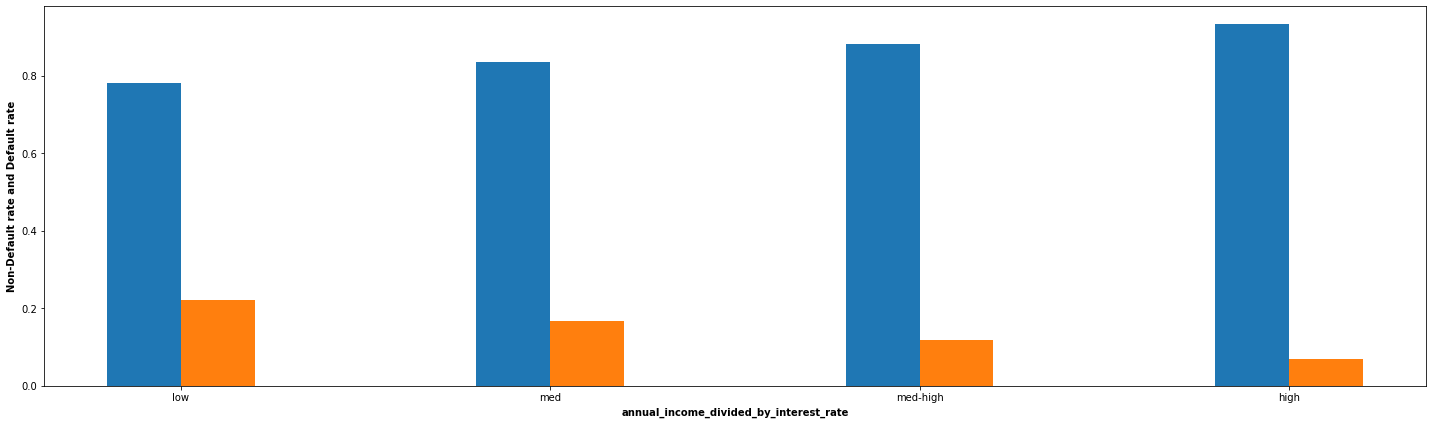

In [1116]:
# Plotting the non-default and default rate
data = [[annual_income_divided_by_interest_rate_low_default_rate[0], annual_income_divided_by_interest_rate_med_default_rate[0], annual_income_divided_by_interest_rate_med_high_default_rate[0], annual_income_divided_by_interest_rate_high_default_rate[0]],
[annual_income_divided_by_interest_rate_low_default_rate[1], annual_income_divided_by_interest_rate_med_default_rate[1], annual_income_divided_by_interest_rate_med_high_default_rate[1], annual_income_divided_by_interest_rate_high_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('annual_income_divided_by_interest_rate', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()


In [1117]:
# Computing the default and non-default rate for term-36-months
annual_income_divided_by_interest_rate_low_term36 = annual_income_divided_by_interest_rate_low[annual_income_divided_by_interest_rate_low['term']==36]
annual_income_divided_by_interest_rate_med_term36 = annual_income_divided_by_interest_rate_med[annual_income_divided_by_interest_rate_med['term']==36]
annual_income_divided_by_interest_rate_med_high_term36 = annual_income_divided_by_interest_rate_med_high[annual_income_divided_by_interest_rate_med_high['term']==36]
annual_income_divided_by_interest_rate_high_term36 = annual_income_divided_by_interest_rate_high[annual_income_divided_by_interest_rate_high['term']==36]

annual_income_divided_by_interest_rate_low_term36_counts = annual_income_divided_by_interest_rate_low_term36['loan_status'].value_counts()
annual_income_divided_by_interest_rate_low_term36_counts_sum = annual_income_divided_by_interest_rate_low_term36_counts.sum()
annual_income_divided_by_interest_rate_low_term36_default_rate = annual_income_divided_by_interest_rate_low_term36_counts / annual_income_divided_by_interest_rate_low_term36_counts_sum

annual_income_divided_by_interest_rate_med_term36_counts = annual_income_divided_by_interest_rate_med_term36['loan_status'].value_counts()
annual_income_divided_by_interest_rate_med_term36_counts_sum = annual_income_divided_by_interest_rate_med_term36_counts.sum()
annual_income_divided_by_interest_rate_med_term36_default_rate = annual_income_divided_by_interest_rate_med_term36_counts / annual_income_divided_by_interest_rate_med_term36_counts_sum

annual_income_divided_by_interest_rate_med_high_term36_counts = annual_income_divided_by_interest_rate_med_high_term36['loan_status'].value_counts()
annual_income_divided_by_interest_rate_med_high_term36_counts_sum = annual_income_divided_by_interest_rate_med_high_term36_counts.sum()
annual_income_divided_by_interest_rate_med_high_term36_default_rate = annual_income_divided_by_interest_rate_med_high_term36_counts / annual_income_divided_by_interest_rate_med_high_term36_counts_sum

annual_income_divided_by_interest_rate_high_term36_counts = annual_income_divided_by_interest_rate_high_term36['loan_status'].value_counts()
annual_income_divided_by_interest_rate_high_term36_counts_sum = annual_income_divided_by_interest_rate_high_term36_counts.sum()
annual_income_divided_by_interest_rate_high_term36_default_rate = annual_income_divided_by_interest_rate_high_term36_counts / annual_income_divided_by_interest_rate_high_term36_counts_sum


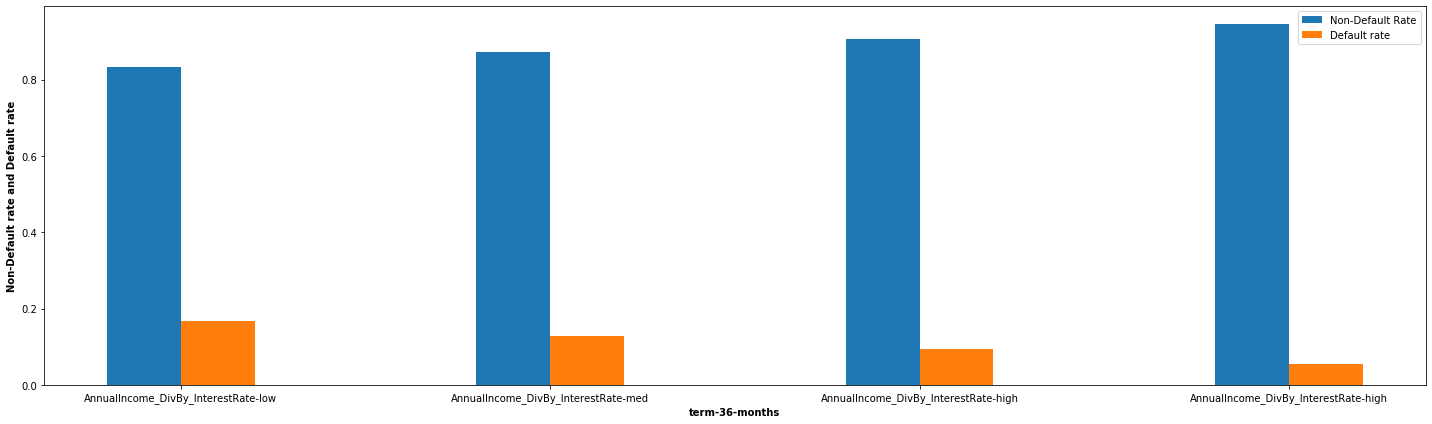

In [1118]:
# Plotting the non-default and default rate for term-36-months
data = [[annual_income_divided_by_interest_rate_low_term36_default_rate[0], annual_income_divided_by_interest_rate_med_term36_default_rate[0], annual_income_divided_by_interest_rate_med_high_term36_default_rate[0], annual_income_divided_by_interest_rate_high_term36_default_rate[0]],
[annual_income_divided_by_interest_rate_low_term36_default_rate[1], annual_income_divided_by_interest_rate_med_term36_default_rate[1], annual_income_divided_by_interest_rate_med_high_term36_default_rate[1], annual_income_divided_by_interest_rate_high_term36_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-36-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['AnnualIncome_DivBy_InterestRate-low', 'AnnualIncome_DivBy_InterestRate-med', 'AnnualIncome_DivBy_InterestRate-high', 'AnnualIncome_DivBy_InterestRate-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


In [1119]:
# Computing the default and non-default rate for term-60-months
annual_income_divided_by_interest_rate_low_term60 = annual_income_divided_by_interest_rate_low[annual_income_divided_by_interest_rate_low['term']==60]
annual_income_divided_by_interest_rate_med_term60 = annual_income_divided_by_interest_rate_med[annual_income_divided_by_interest_rate_med['term']==60]
annual_income_divided_by_interest_rate_med_high_term60 = annual_income_divided_by_interest_rate_med_high[annual_income_divided_by_interest_rate_med_high['term']==60]
annual_income_divided_by_interest_rate_high_term60 = annual_income_divided_by_interest_rate_high[annual_income_divided_by_interest_rate_high['term']==60]

annual_income_divided_by_interest_rate_low_term60_counts = annual_income_divided_by_interest_rate_low_term60['loan_status'].value_counts()
annual_income_divided_by_interest_rate_low_term60_counts_sum = annual_income_divided_by_interest_rate_low_term60_counts.sum()
annual_income_divided_by_interest_rate_low_term60_default_rate = annual_income_divided_by_interest_rate_low_term60_counts / annual_income_divided_by_interest_rate_low_term60_counts_sum

annual_income_divided_by_interest_rate_med_term60_counts = annual_income_divided_by_interest_rate_med_term60['loan_status'].value_counts()
annual_income_divided_by_interest_rate_med_term60_counts_sum = annual_income_divided_by_interest_rate_med_term60_counts.sum()
annual_income_divided_by_interest_rate_med_term60_default_rate = annual_income_divided_by_interest_rate_med_term60_counts / annual_income_divided_by_interest_rate_med_term60_counts_sum

annual_income_divided_by_interest_rate_med_high_term60_counts = annual_income_divided_by_interest_rate_med_high_term60['loan_status'].value_counts()
annual_income_divided_by_interest_rate_med_high_term60_counts_sum = annual_income_divided_by_interest_rate_med_high_term60_counts.sum()
annual_income_divided_by_interest_rate_med_high_term60_default_rate = annual_income_divided_by_interest_rate_med_high_term60_counts / annual_income_divided_by_interest_rate_med_high_term60_counts_sum

annual_income_divided_by_interest_rate_high_term60_counts = annual_income_divided_by_interest_rate_high_term60['loan_status'].value_counts()
annual_income_divided_by_interest_rate_high_term60_counts_sum = annual_income_divided_by_interest_rate_high_term60_counts.sum()
annual_income_divided_by_interest_rate_high_term60_default_rate = annual_income_divided_by_interest_rate_high_term60_counts / annual_income_divided_by_interest_rate_high_term60_counts_sum


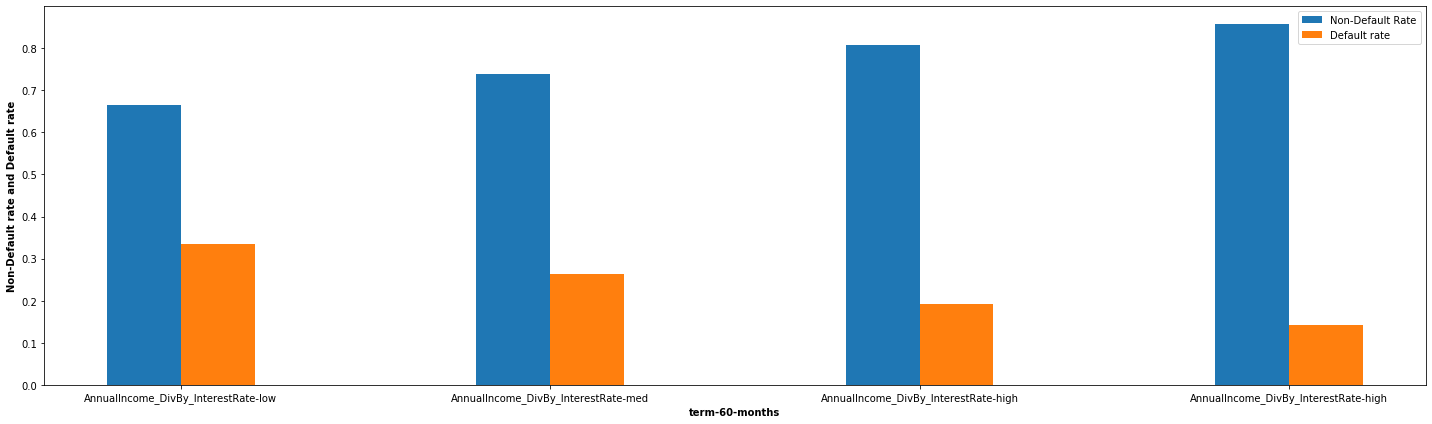

In [1120]:
# Plotting the non-default and default rate for term-60-months
data = [[annual_income_divided_by_interest_rate_low_term60_default_rate[0], annual_income_divided_by_interest_rate_med_term60_default_rate[0], annual_income_divided_by_interest_rate_med_high_term60_default_rate[0], annual_income_divided_by_interest_rate_high_term60_default_rate[0]],
[annual_income_divided_by_interest_rate_low_term60_default_rate[1], annual_income_divided_by_interest_rate_med_term60_default_rate[1], annual_income_divided_by_interest_rate_med_high_term60_default_rate[1], annual_income_divided_by_interest_rate_high_term60_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('term-60-months', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
          ['AnnualIncome_DivBy_InterestRate-low', 'AnnualIncome_DivBy_InterestRate-med', 'AnnualIncome_DivBy_InterestRate-high', 'AnnualIncome_DivBy_InterestRate-high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()


##############################
#### installment
##############################

In [1121]:
# Showing the statistical values of the variable
lending_1.installment.describe()

count   37544.00
mean      324.65
std       208.90
min        15.69
25%       167.37
50%       280.00
75%       428.94
max      1305.19
Name: installment, dtype: float64

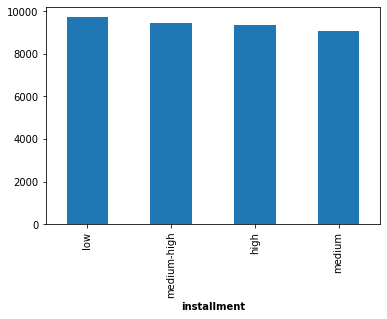

In [1122]:
# Plotting the counts of the range
lending_1['installment_1'] = np.nan
lending_1['installment_1'] = np.where((lending_1['installment'] >= 0) & (lending_1['installment'] <= 170),'low',lending_1['installment_1'])
lending_1['installment_1'] = np.where((lending_1['installment'] > 170) & (lending_1['installment'] <= 280),'medium',lending_1['installment_1'])
lending_1['installment_1'] = np.where((lending_1['installment'] > 280) & (lending_1['installment'] <= 430),'medium-high',lending_1['installment_1'])
lending_1['installment_1'] = np.where((lending_1['installment'] > 430),'high',lending_1['installment_1'])
pd.value_counts(lending_1['installment_1'])
pd.value_counts(lending_1['installment_1']).plot.bar()
plt.xlabel('installment', fontweight ='bold')
plt.show()


In [1123]:
# Computing the default and non-default rate
installment_low = lending_1[lending_1['installment_1']=='low']
installment_med = lending_1[lending_1['installment_1']=='medium']
installment_med_high = lending_1[lending_1['installment_1']=='medium-high']
installment_high = lending_1[lending_1['installment_1']=='high']

installment_low_counts = installment_low['loan_status'].value_counts()
installment_low_counts_sum = installment_low_counts.sum()
installment_low_default_rate = installment_low_counts / installment_low_counts_sum

installment_med_counts = installment_med['loan_status'].value_counts()
installment_med_counts_sum = installment_med_counts.sum()
installment_med_default_rate = installment_med_counts / installment_med_counts_sum

installment_med_high_counts = installment_med_high['loan_status'].value_counts()
installment_med_high_counts_sum = installment_med_high_counts.sum()
installment_med_high_default_rate = installment_med_high_counts / installment_med_high_counts_sum

installment_high_counts = installment_high['loan_status'].value_counts()
installment_high_counts_sum = installment_high_counts.sum()
installment_high_default_rate = installment_high_counts / installment_high_counts_sum


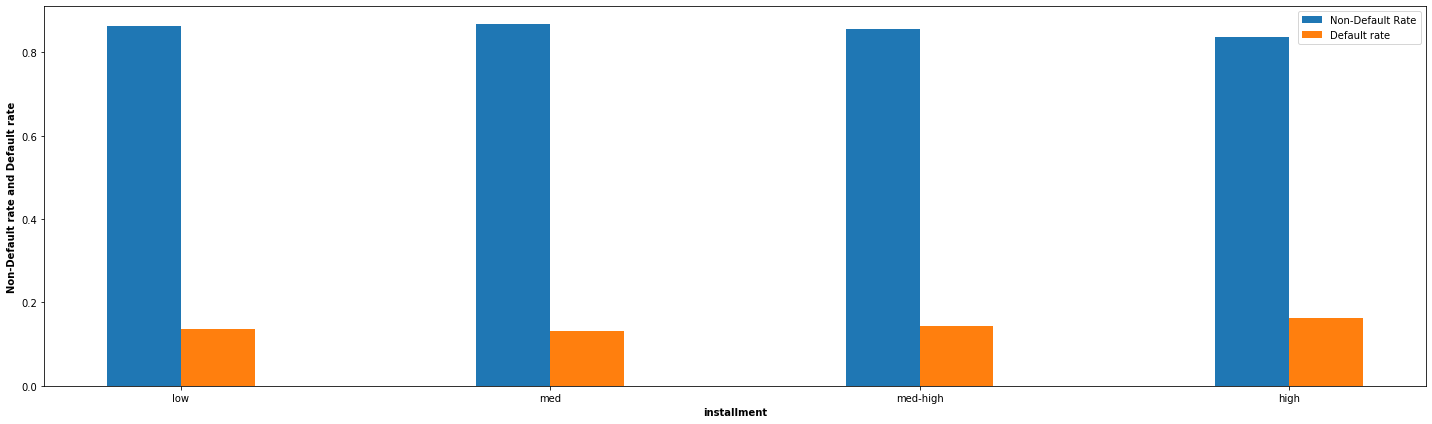

In [1124]:
# Plotting the non-default and default rate
data = [[installment_low_default_rate[0], installment_med_default_rate[0], installment_med_high_default_rate[0], installment_high_default_rate[0]],
[installment_low_default_rate[1], installment_med_default_rate[1], installment_med_high_default_rate[1], installment_high_default_rate[1]]]

fig = plt.subplots(figsize =(20, 6)) 

plt.xlabel('installment', fontweight ='bold') 
plt.ylabel('Non-Default rate and Default rate', fontweight ='bold') 
plt.xticks([y + 0.1 for y in range(len(data[1]))], 
           ['low', 'med', 'med-high', 'high'])

x = np.arange(len(data[1]))
Non_Default = plt.bar(x, data[0], width = 0.2, label='Non-Default Rate')
Default = plt.bar(x + 0.2, data[1], width = 0.2, label='Default rate')
plt.tight_layout()
plt.legend()
plt.show()
